 # **Projet 3** **OpenFoodFacts**

- Source de données:   https://world.openfoodfacts.org/data
- Projet de manipulations de données à partir de données de la base openfoodfacts.
- idée de projet: creér une application liées à l'alimentation 
- idée de l'application : prediction du nutriscore 


In [ ]:
!pip install -U -q PyDrive 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Environnement & Imports

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sp
import sklearn

Chargement Dataset

In [ ]:
downloaded = drive.CreateFile({'id':'1No1Vg5a4R9UCsInSQEnim23PwPa6FL72'})
downloaded.GetContentFile('en.openfoodfacts.org.products.csv')
df = pd.read_csv('en.openfoodfacts.org.products.csv', sep = '\t', header = None)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,3,5,24,25,26,27,28,36,41,42,43,44,47,48,49,50,51,53,55,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


**Partie 1 : Traiter le jeu de données afin de repérer des variables pertinentes pour les traitements à venir**

Informations sur les données

In [ ]:
df.shape

(16959, 181)

In [ ]:
df.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180
0,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,...,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
1,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,NaN,130 g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


on a une base de données regroupant les produits avec différents indicateurs nutritionnelle 

In [ ]:
df= df.rename(columns=df.iloc[0])
df= df.drop([0])
#df= df[1:]

In [ ]:
df.columns.tolist()

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'generic_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_en',
 'origins',
 'origins_tags',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_en',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities',
 'cities_tags',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_en',
 'ingredients_text',
 'allergens',
 'allergens_en',
 'traces',
 'traces_tags',
 'traces_en',
 'serving_size',
 'serving_quantity',
 'no_nutriments',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_en',
 'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil',
 'ingredients_that_may_be_from_palm_

In [ ]:
df.dtypes.value_counts()

object    181
dtype: int64

In [ ]:
df.isna().sum()

code                      0
url                       0
creator                   0
created_t                 0
created_datetime          0
                      ...  
choline_100g          16958
phylloquinone_100g    16884
beta-glucan_100g      16958
inositol_100g         16958
carnitine_100g        16958
Length: 181, dtype: int64

analyse de forme 
- Dimensions : (16959, 181)
- Type de variables : object : 181
- Analyse de valeur manquante : beaucoup de NaN

**Etude** **exploratoire** 

supprimer les dates 

In [ ]:
columns_drop = ['created_t','last_modified_t','last_modified_datetime','created_datetime']
df = df.drop(columns_drop, axis=1)

supprimer toutes les colonnes sans nutriscore renseigné

In [ ]:
df.dropna(subset=['nutrition-score-fr_100g'],inplace=True)
df['nutrition-score-fr_100g'].isna().sum()

0

selectionner les colonnes avec un taux de 100g 

In [ ]:
#suprrimer les colonnes inutiles
col_to_drop= ['code','url','creator','generic_name','packaging','packaging_tags','brands','brands_tags','categories','categories_tags','categories_en','origins','origins_tags','manufacturing_places','manufacturing_places_tags','labels','labels_tags','labels_en','emb_codes','emb_codes_tags','first_packaging_code_geo','cities','cities_tags','purchase_places','stores','countries','countries_tags','countries_en','ingredients_text','allergens','allergens_en','traces','traces_tags','traces_en','serving_size','serving_quantity','no_nutriments','additives_n','additives','additives_tags','additives_en','ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil','ingredients_from_palm_oil_tags','ingredients_that_may_be_from_palm_oil_n','ingredients_that_may_be_from_palm_oil','energy_100g','ingredients_that_may_be_from_palm_oil_tags','states','states_tags','nutrition-score-uk_100g','states_en','brand_owner','main_category','main_category_en','image_url','image_small_url','image_ingredients_url','image_ingredients_small_url','image_nutrition_url','image_nutrition_small_url','nutriscore_score','nova_group','pnns_groups_1','pnns_groups_2']
df = df.drop(col_to_drop, axis =1)

In [ ]:
df.shape

(10483, 112)

In [ ]:
df.head(1)

,product_name,quantity,nutriscore_grade,energy-kj_100g,energy-kcal_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,...,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
4,moutarde au moût de raisin,100g,d,936,NaN,NaN,8.2,2.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN


étude des valeurs manquantes : 


remplacer les "faux NaN" par le NaN reconnus par pandas

In [ ]:
df.replace('unknown', np.NaN)
df.replace('Unknown', np.NaN)
df.replace('dgesc',np.NaN)

,product_name,quantity,nutriscore_grade,energy-kj_100g,energy-kcal_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,...,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
4,moutarde au moût de raisin,100g,d,936,NaN,NaN,8.2,2.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,Salade de carottes râpées,NaN,b,NaN,32,NaN,0.3,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,Tarte noix de coco,NaN,d,NaN,381,NaN,22,15.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,Compote de poire,NaN,a,NaN,157,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,Salade de macedoine de légumes,NaN,b,NaN,143,NaN,12.7,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16942,Caramelized vanilla honey chilled coffee drink...,NaN,e,NaN,72,NaN,1.11,0.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.074,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16943,"Salted dark chocolate chilled coffee drink, sa...",NaN,e,NaN,64,NaN,1.23,0.74,NaN,NaN,N

observer le taux de NaNs pour chaque colonne

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe13546fb70>],
      dtype=object)

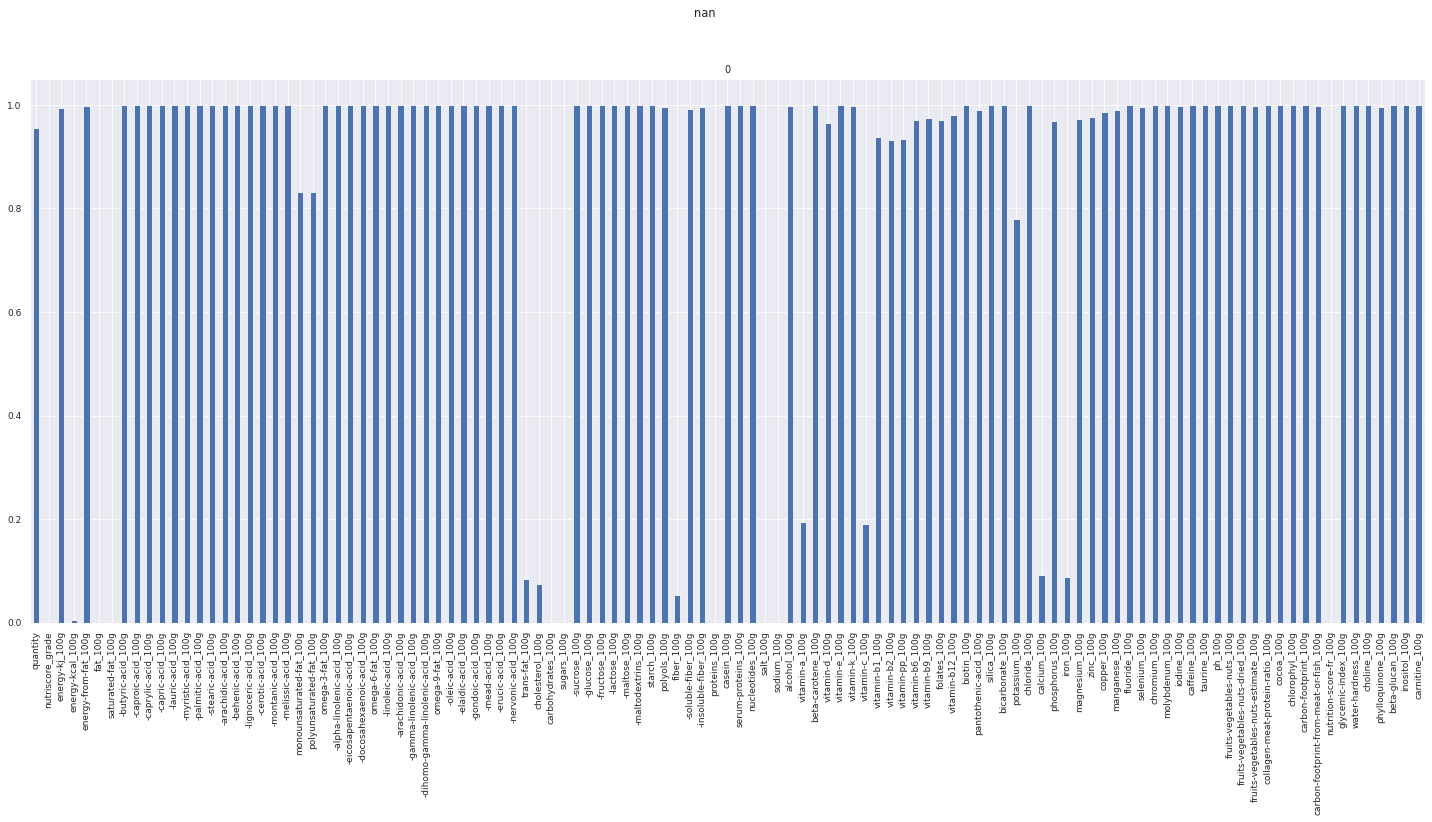

In [ ]:
df.set_index('product_name', inplace = True) 
missing_values = df.isnull().sum() / len(df)
#missing_values = missing_values[missing_values > 0] 
#missing_values.sort_values(inplace=True)
dfY = pd.DataFrame(missing_values)
dfY.plot(kind='bar', subplots=True, rot = 90, title ="nan", legend= False ,figsize=(25, 10), fontsize=9)

tableau reprsenter le Taux de NaN uniquement pour les aliments qui ont deja un nutri-score 

In [ ]:
df_nan= pd.DataFrame({'score_nan' : missing_values})

NameError: ignored

In [ ]:
df_nan.head(15)

,score_nan
quantity,0.955070
nutriscore_grade,0.000000
energy-kj_100g,0.993704
energy-kcal_100g,0.004865
energy-from-fat_100g,0.997615
fat_100g,0.000000
saturated-fat_100g,0.000000
-butyric-acid_100g,1.000000
-caproic-acid_100g,1.000000
-caprylic-acid_100g,1.000000


La base de donnée semble bien avoir des valeurs manquantes, avec des  proportions differentes pour cela on selection les colonnes avec moins de 75% de NaN ensuite on va proposer une solution pour imputer les valeurs manquantes restant.

In [ ]:
df = df.loc[:, df.isnull().mean() <= .75]

In [ ]:
df.shape

(10483, 17)

Correction des types


In [ ]:
df.dtypes

nutriscore_grade           object
energy-kcal_100g           object
fat_100g                   object
saturated-fat_100g         object
trans-fat_100g             object
cholesterol_100g           object
carbohydrates_100g         object
sugars_100g                object
fiber_100g                 object
proteins_100g              object
salt_100g                  object
sodium_100g                object
vitamin-a_100g             object
vitamin-c_100g             object
calcium_100g               object
iron_100g                  object
nutrition-score-fr_100g    object
dtype: object

In [ ]:
cols = df.columns.drop('nutriscore_grade')
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce',axis=1)

In [ ]:
df.dtypes

nutriscore_grade            object
energy-kcal_100g           float64
fat_100g                   float64
saturated-fat_100g         float64
trans-fat_100g             float64
cholesterol_100g           float64
carbohydrates_100g         float64
sugars_100g                float64
fiber_100g                 float64
proteins_100g              float64
salt_100g                  float64
sodium_100g                float64
vitamin-a_100g             float64
vitamin-c_100g             float64
calcium_100g               float64
iron_100g                  float64
nutrition-score-fr_100g    float64
dtype: object

matrice de correlation avant la manipulation de données 

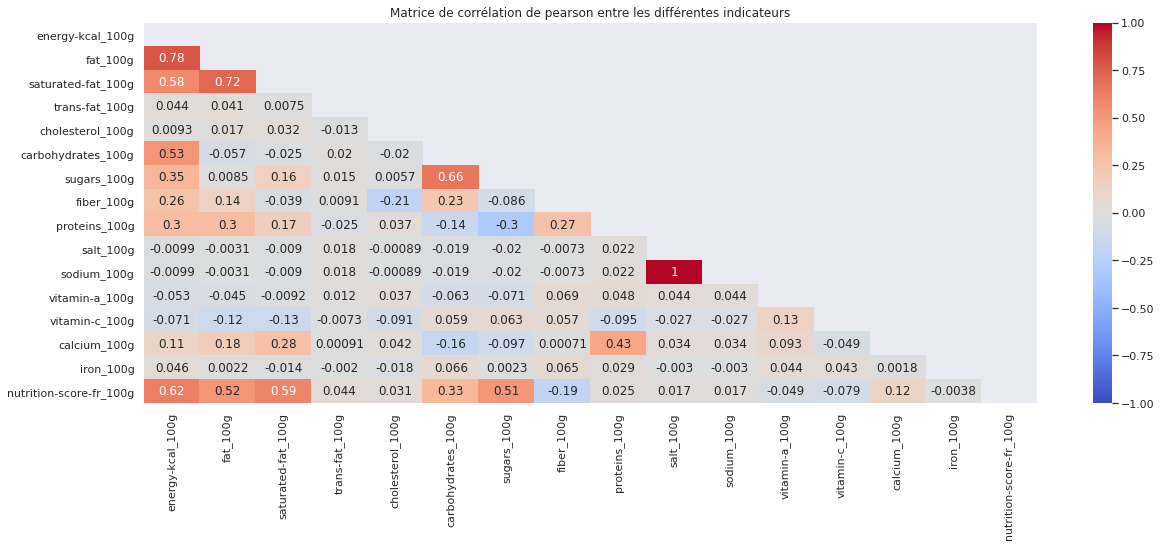

In [ ]:
plt.figure(figsize=(20,7))
sns.set(font_scale=1)
num_col= df.select_dtypes(include = ['float64']).columns
corr = df[num_col].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.title('Matrice de corrélation de pearson entre les différentes indicateurs')
sns.heatmap(corr,mask=mask,vmin=-1,vmax=1,cmap='coolwarm',center=0,annot=True)

On supprime les variables trop corrélées (corrélation supérieure à 0.8)

In [ ]:
df.drop(columns='sodium_100g',inplace=True)

distribution de variable avant la detection de valeurs aberrantes 

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


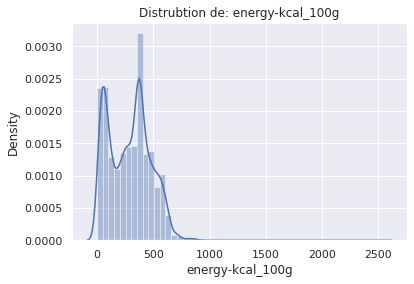

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


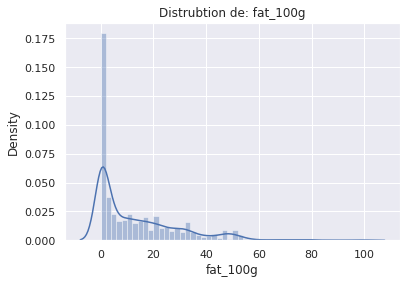

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


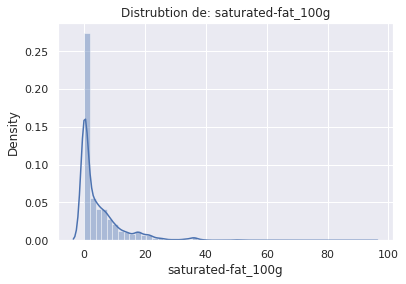

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


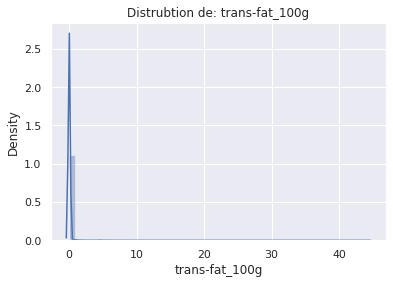

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


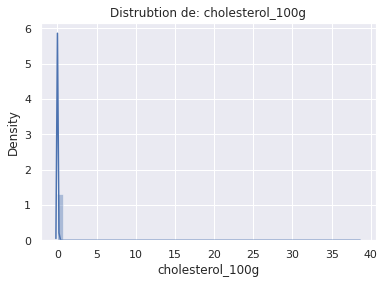

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


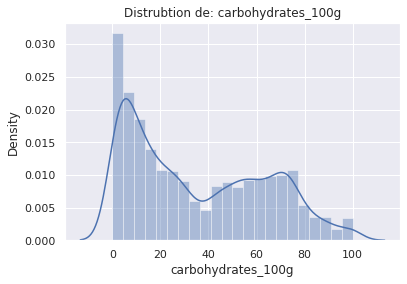

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


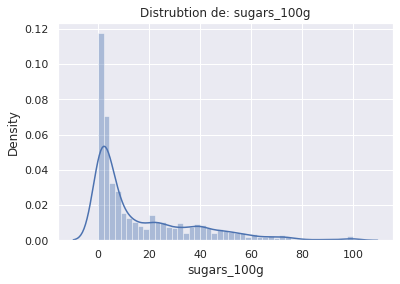

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


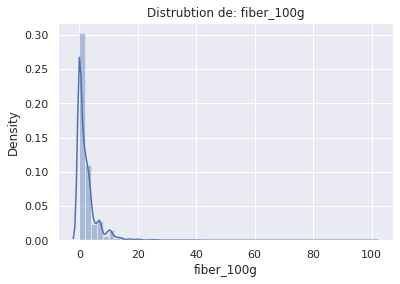

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


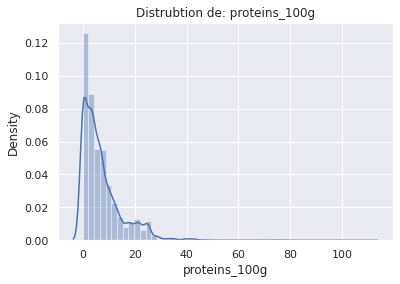

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


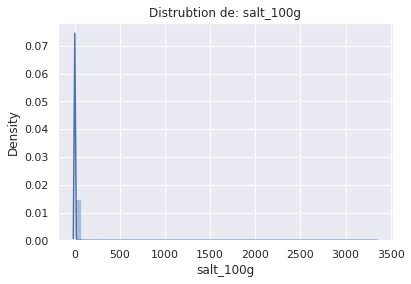

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


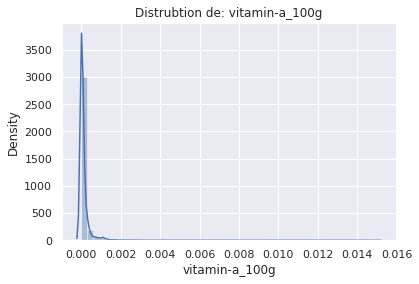

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


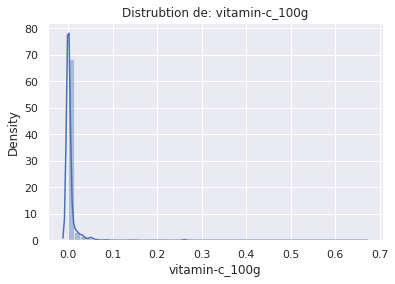

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


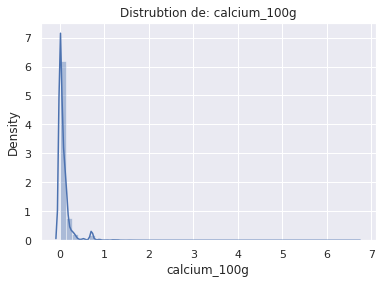

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


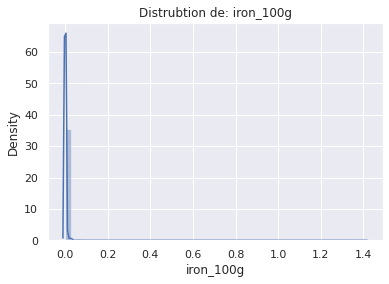

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


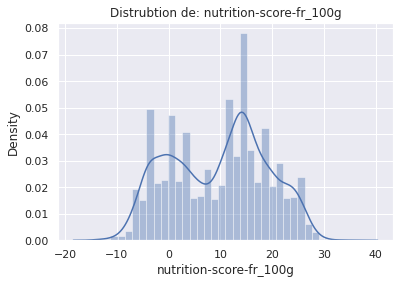

In [ ]:
df_c1 = df.copy()
numeric_col = df_c1.select_dtypes(include = ['float64']).columns
for column in numeric_col: 
    plt.figure(figsize = (6,4))
    sns.distplot(df[column],axlabel=column)
    plt.title('Distrubtion de: {}'.format(column))
    plt.show()

In [ ]:
pd.set_option('display.max_rows', 10483)

détection des valeurs aberrantes : 
- détecter les valeurs de taux de 100g qui sont inférieures à 0 ou supérieures à 100 
- sommer des indicateurs non joints (protéines, glucides, gras) et supprimer les produits qui ont une somme supérieure à 100
- détecter les valeurs de nutriscore hors l'intervalle de ]-14, 40[

In [ ]:
for colus in df.columns.tolist()[2:15]:
  for val in df[colus]:
    if val < 0.0:
      df[colus].replace(val,np.nan,inplace=True)

for colus in df.columns.tolist()[2:15]:
  for val in df[colus]:
    if val > 100.0:
      df[colus].replace(val,np.nan,inplace=True)

for val in df['energy-kcal_100g']:
    if val > 900.0 :
      df['energy-kcal_100g'].replace(val,np.nan,inplace=True)

for val in df['energy-kcal_100g']:
    if val <= 0.0 :
      df['energy-kcal_100g'].replace(val,np.nan,inplace=True)      

for val in df['nutrition-score-fr_100g']:
  if -15 > val > 40:
    df['nutrition-score-fr_100g'].replace(val,np.nan,inplace=True)

      

In [ ]:
df['indicateurs_n_joints'] = (df['proteins_100g']+df['fat_100g']+df['carbohydrates_100g'])
df = df.loc[df['indicateurs_n_joints']< 100.0]
#supprimer colonne 
df= df.drop(columns="indicateurs_n_joints")

In [ ]:
df.shape

(10097, 16)

- Imputation des NaN  par la méthodes des K plus proches voisins (kNN)



---


1.   Effectuer un sampling: on divise le jeu de données en données d'entrainement (80%) et de test (20%)  à l'aide de la fonction train_test_split , cette fonction est dans : le model_selection 









In [ ]:
from sklearn.impute import KNNImputer
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.model_selection import train_test_split
#classe pour standardisation
from sklearn.preprocessing import StandardScaler
df1= df.drop(columns=['nutrition-score-fr_100g','nutriscore_grade'])
df2 = df[['nutrition-score-fr_100g','nutriscore_grade']]
xtrain, xtest, ytrain, ytest = train_test_split(df1, df2, train_size=.8,random_state=9)
#transformation – centrage et réduction
sc = StandardScaler()
xtrain_scaled = sc.fit_transform(xtrain)
print(xtrain_scaled)
#Verfions les propriétés du nouvel ensemble de données:
#moyenne : nulle
print(xtrain_scaled.mean(axis=0))
#écart-type : unitaires 
print(xtrain_scaled.std(axis=0))

[[-0.4288384   0.2143855   0.05574637 ... -0.24363946  0.17045971
  -0.02589655]
 [ 0.17376514  0.65625084  1.16320271 ... -0.24363946  2.27542711
  -0.09147719]
 [ 1.72491129  2.51195917  0.63663856 ... -0.24363946 -0.16024589
   0.00689377]
 ...
 [-0.03826203 -0.74876746 -0.67002061 ... -0.24363946 -0.19174166
   0.12712494]
 [-1.07607924 -0.52121627  0.02649281 ... -0.11007159 -0.39646418
  -0.05212881]
 [-1.18209283 -0.83638413 -0.67002061 ... -0.24363946 -0.13399941
  -0.09147719]]
[            nan -3.34290256e-17  3.56283036e-17             nan
             nan  1.90897330e-16  3.58482314e-17             nan
  4.39855600e-17             nan             nan             nan
             nan             nan]
[nan  1.  1. nan nan  1.  1. nan  1. nan nan nan nan nan]


In [ ]:
df_sc= pd.DataFrame(data=xtrain_scaled,columns=['energy-kcal_100g','fat_100g','saturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g','carbohydrates_100g','sugars_100g','fiber_100g', 'proteins_100g','salt_100g', 'vitamin-a_100g', 'vitamin-c_100g','calcium_100g', 'iron_100g'])

In [ ]:
df_sc.isna().sum()

energy-kcal_100g       132
fat_100g                 0
saturated-fat_100g       0
trans-fat_100g         684
cholesterol_100g       610
carbohydrates_100g       0
sugars_100g              0
fiber_100g             416
proteins_100g            0
salt_100g                1
vitamin-a_100g        1563
vitamin-c_100g        1525
calcium_100g           732
iron_100g              707
dtype: int64

In [ ]:
#Transform (X) : Impute all missing values in X.
#Imputes missing data in numpy array :data_imputed
model_impute = KNNImputer(missing_values=np.nan, n_neighbors=3)
data_imputed = model_impute.fit_transform(xtrain_scaled)

In [ ]:
#transform the data imputed from an array to a dataframe 
df_imputed = pd.DataFrame(data=data_imputed,columns=['energy-kcal_100g','fat_100g','saturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g','carbohydrates_100g','sugars_100g','fiber_100g', 'proteins_100g','salt_100g', 'vitamin-a_100g', 'vitamin-c_100g','calcium_100g', 'iron_100g'])

In [ ]:
df_imputed.isna().sum().sum()

0

In [ ]:
x_test_imputed= sc.transform(xtest)
test_imputed= model_impute.transform(x_test_imputed)

In [ ]:
df_test= pd.DataFrame(data=test_imputed,columns=['energy-kcal_100g','fat_100g','saturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g','carbohydrates_100g','sugars_100g','fiber_100g', 'proteins_100g','salt_100g', 'vitamin-a_100g', 'vitamin-c_100g','calcium_100g', 'iron_100g'])

In [ ]:
#20% du data set
df_test.shape

(2020, 14)

In [ ]:
#df_train
ytrain.reset_index(inplace=True)
df = pd.concat([df_imputed,ytrain],axis=1, sort=False)
df.set_index('product_name',inplace=True)

In [ ]:
#80% du data set
df.shape

(8077, 16)

In [ ]:
df.isna().sum().sum()

0

Distribution des variables avant et après imputation des NaN

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

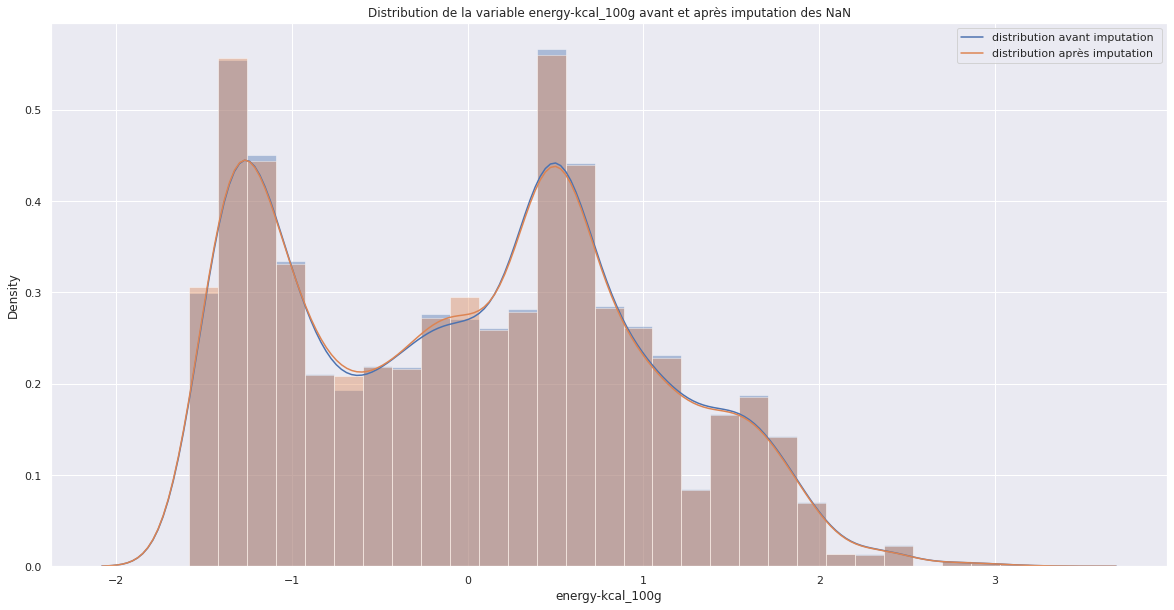

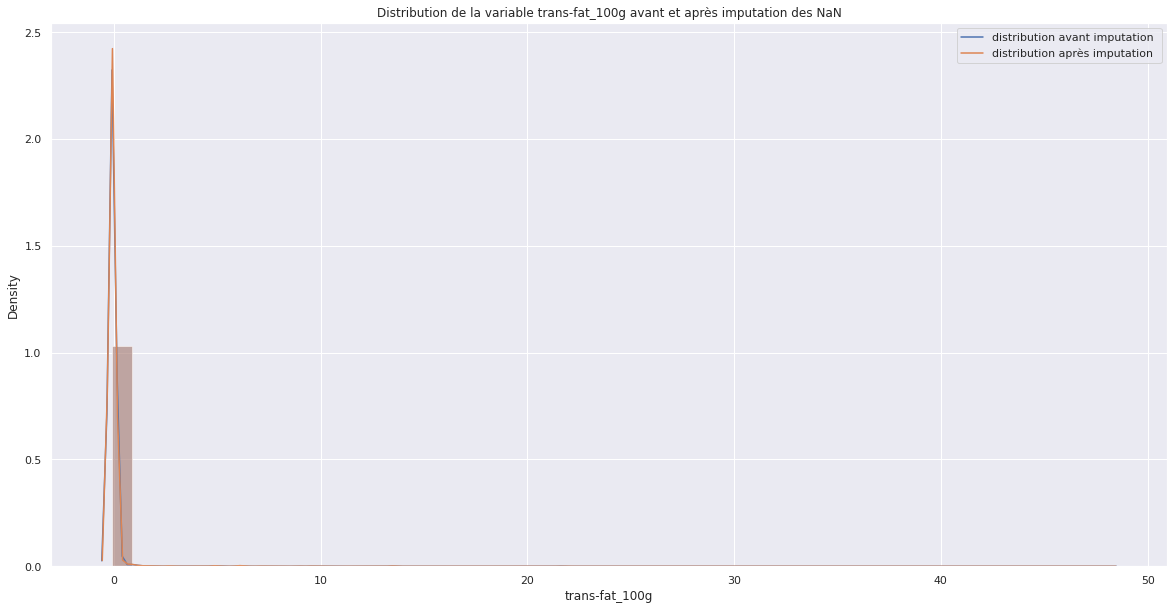

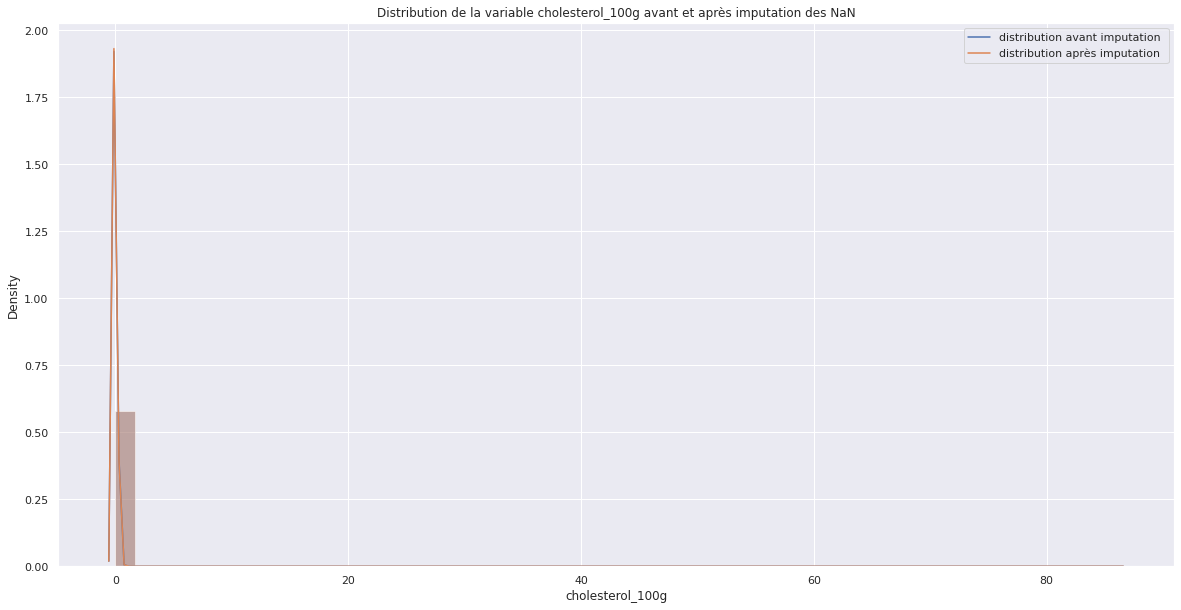

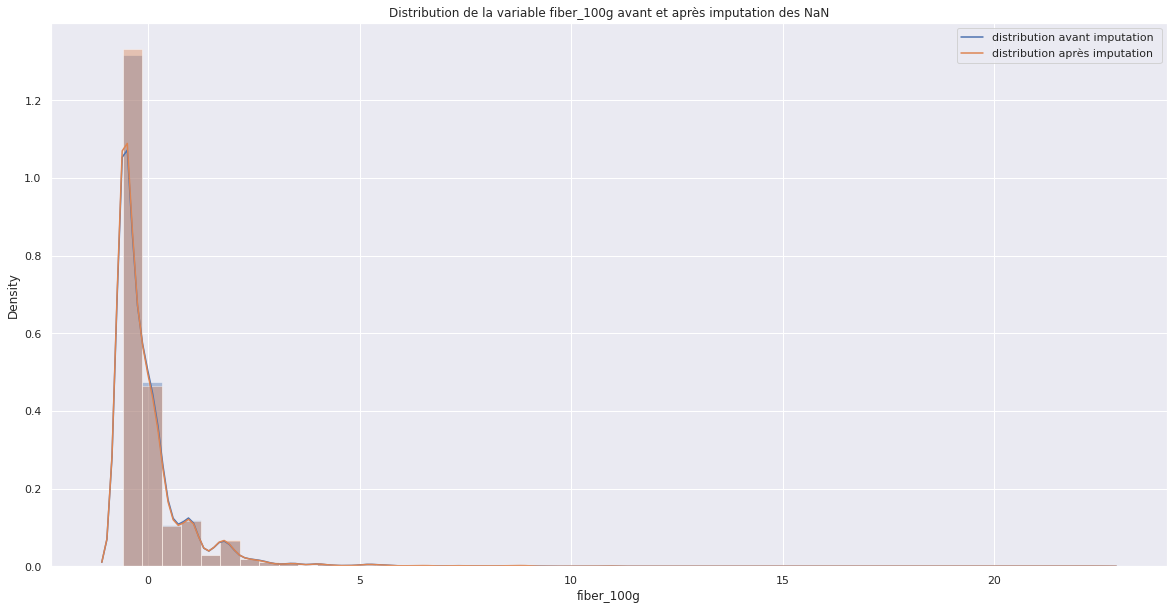

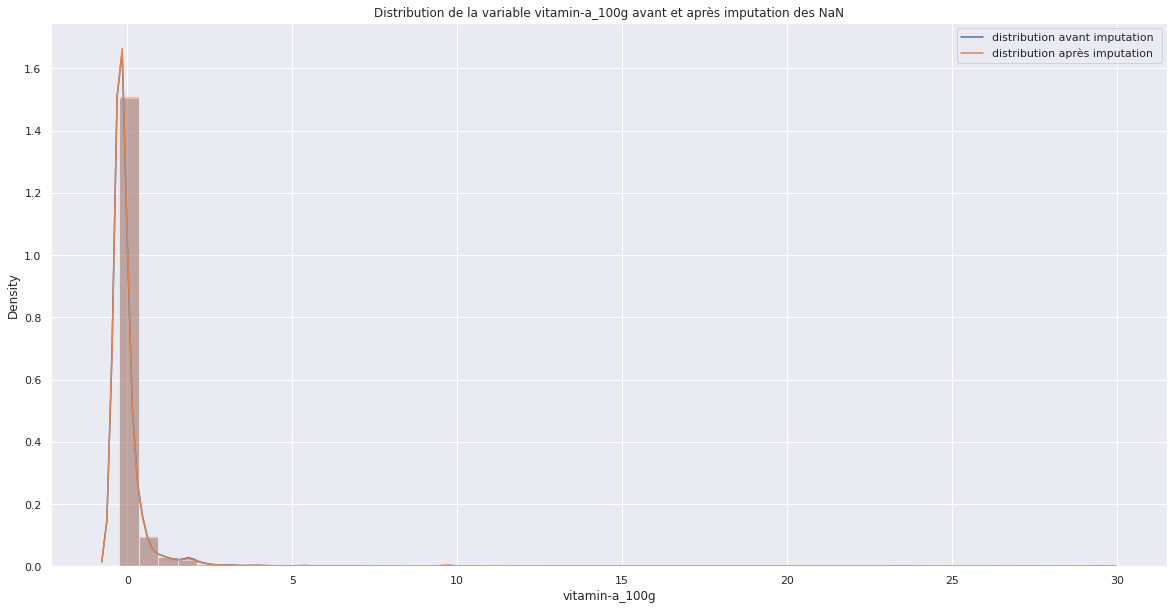

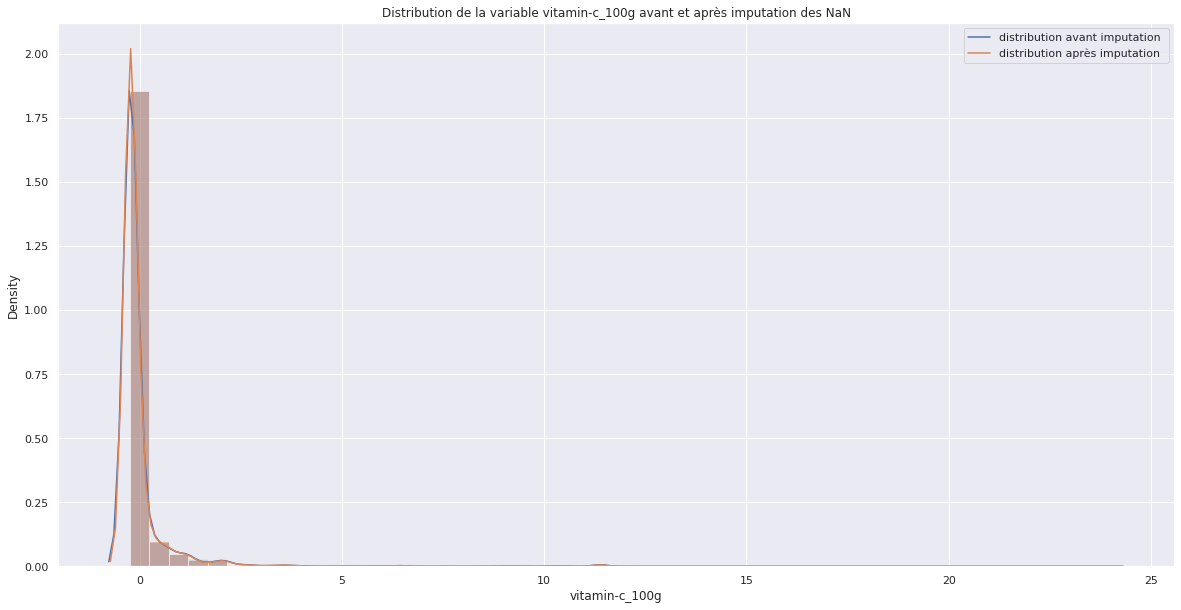

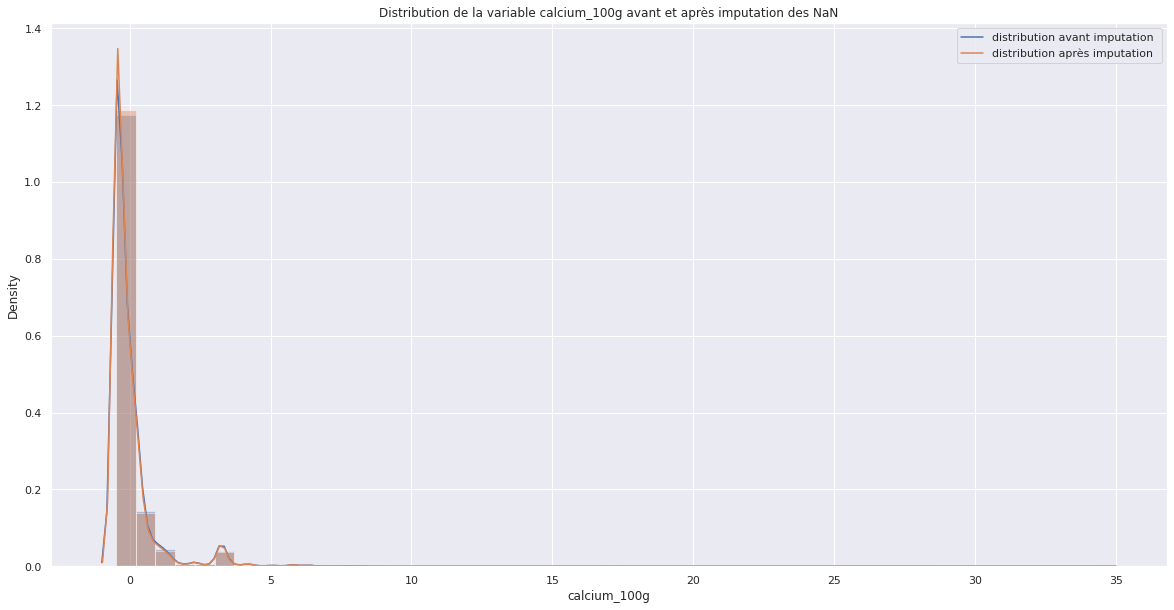

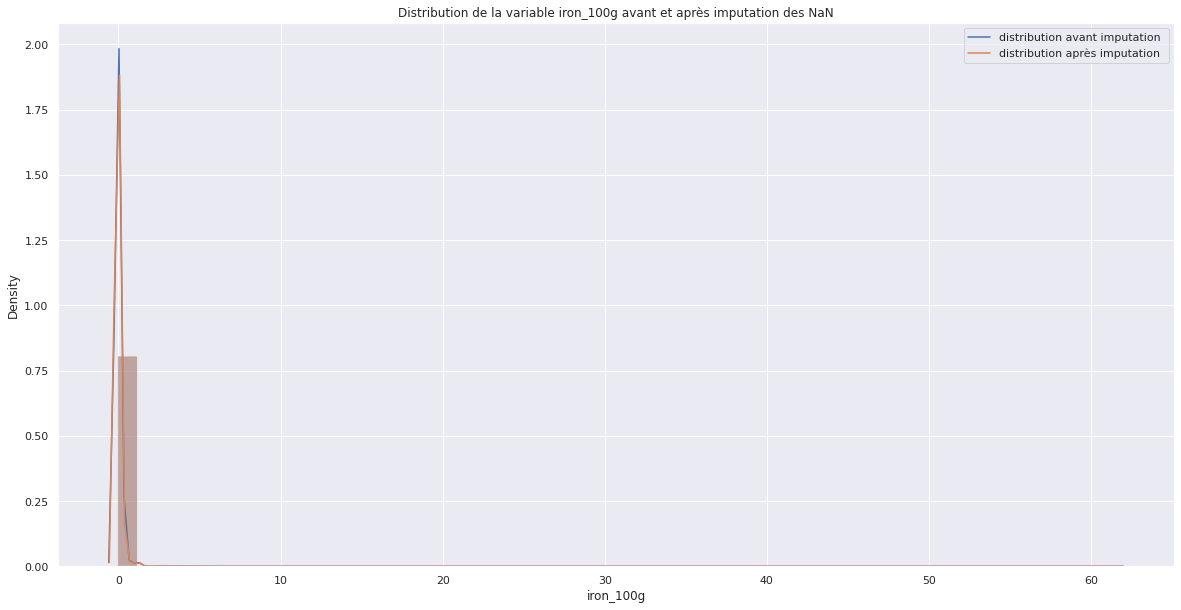

In [ ]:
for column in ['energy-kcal_100g','trans-fat_100g','cholesterol_100g','fiber_100g','vitamin-a_100g','vitamin-c_100g','calcium_100g','iron_100g']:
    plt.figure(figsize=(20,10))
    plt.title('Distribution de la variable ' + column + ' avant et après imputation des NaN')
    sns.distplot(df_sc[column])
    sns.distplot(df[column])
    plt.legend(['distribution avant imputation ', 'distribution après imputation'])

on a réussi à remplir toutes les valeurs manquantes. 

## 1.Analyse Univariée

**Partie 2 : Effectuer une analyse univariée pour chaque variable intéressante, afin de synthétiser son comportement : Distribution**

**1.1 Test de Normalite** : Kolmogorov Smirnov  (K-S) 

ce test renvoie deux nombres : la statistique D et la valeur p, la valeur de p represente la probabilte de tromper selon cette valeur on peut savoir si on rejetée l'hypothese nulle (H0) ou non , pour cela p est petit.

- H0 : x suit la distribution normale
- H1 : La distribution de la variable ne suit pas une loi normale.

In [ ]:
from scipy import stats
from scipy.stats import kstest 
alpha = 0.05
num_col= df.select_dtypes(include = ['float64']).columns
for column in num_col:
  p = stats.kstest(df[column],'norm')[1]
  print(('pour {}').format(column))
  print("p = {}".format(p))
  if p < alpha:  # H0: x a une distribution normale
        print(" Alors H0 est rejetée car : {} ne suit pas la distribution normale".format(column))
  else:
        print("Alors H0 ne peut être rejetée car :{} suit la distribution normale".format(column))

pour energy-kcal_100g
p = 1.7545795084527088e-61
 Alors H0 est rejetée car : energy-kcal_100g ne suit pas la distribution normale
pour fat_100g
p = 3.456366541843126e-285
 Alors H0 est rejetée car : fat_100g ne suit pas la distribution normale
pour saturated-fat_100g
p = 0.0
 Alors H0 est rejetée car : saturated-fat_100g ne suit pas la distribution normale
pour trans-fat_100g
p = 0.0
 Alors H0 est rejetée car : trans-fat_100g ne suit pas la distribution normale
pour cholesterol_100g
p = 0.0
 Alors H0 est rejetée car : cholesterol_100g ne suit pas la distribution normale
pour carbohydrates_100g
p = 3.00355918254182e-113
 Alors H0 est rejetée car : carbohydrates_100g ne suit pas la distribution normale
pour sugars_100g
p = 5.202819916694e-311
 Alors H0 est rejetée car : sugars_100g ne suit pas la distribution normale
pour fiber_100g
p = 0.0
 Alors H0 est rejetée car : fiber_100g ne suit pas la distribution normale
pour proteins_100g
p = 6.947864936802973e-216
 Alors H0 est rejetée car : 

Observations : Le test de Kolmogorov Smirnov confirme la non normalité des distributions de données : on ne peut appliquer l'analyse de la variance.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


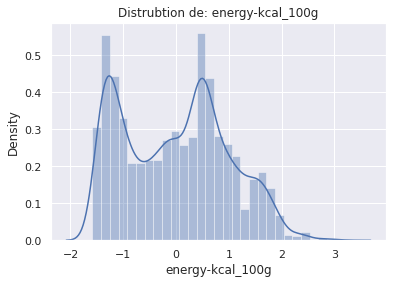

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


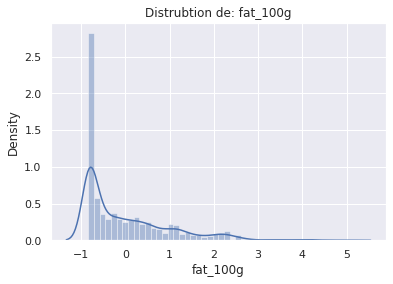

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


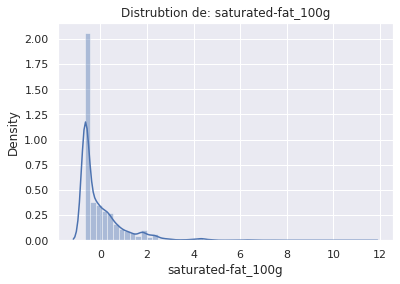

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


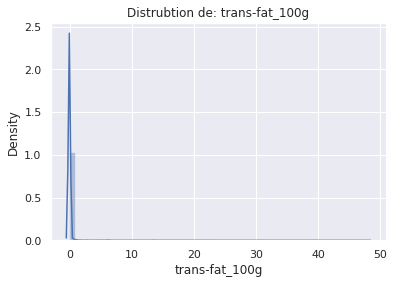

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


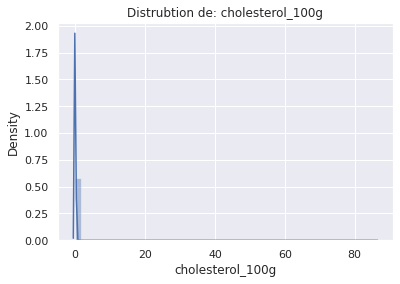

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


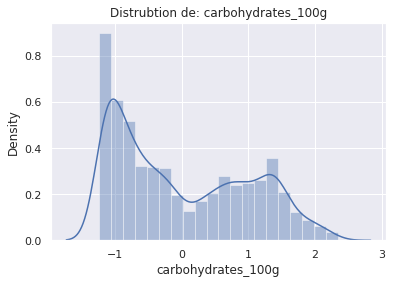

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


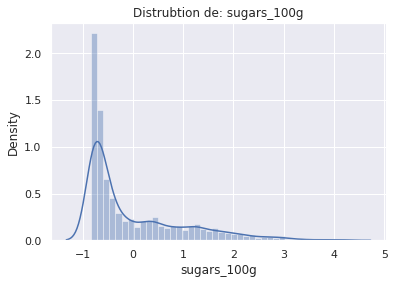

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


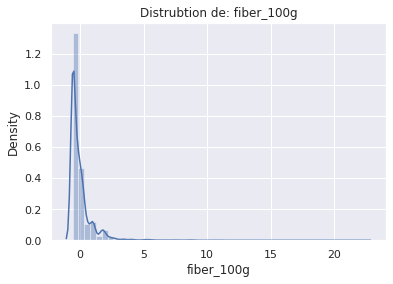

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


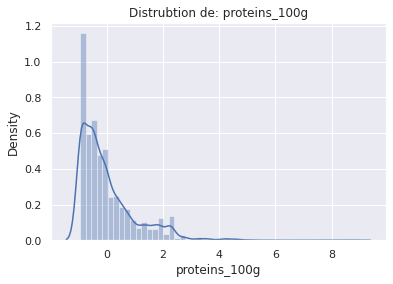

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


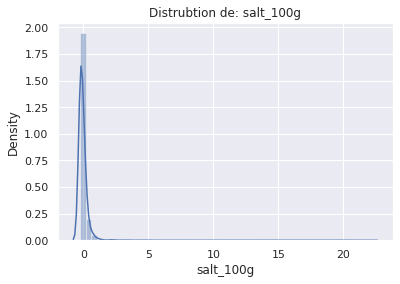

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


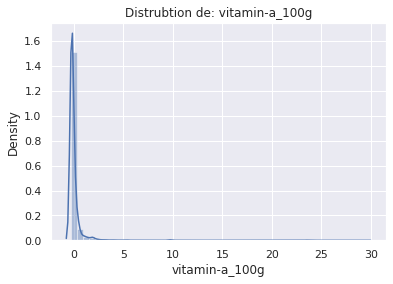

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


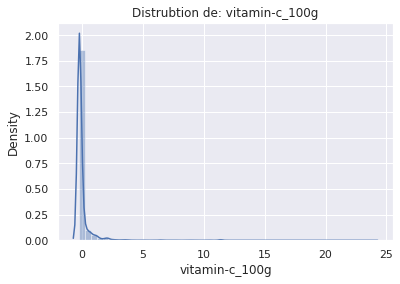

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


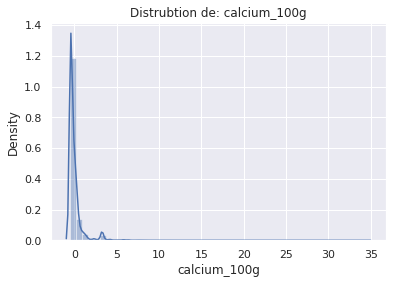

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


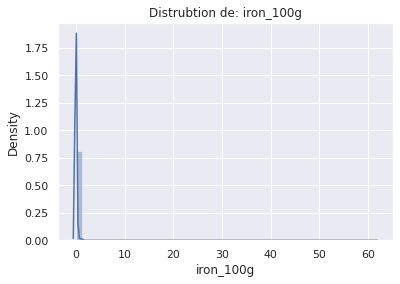

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


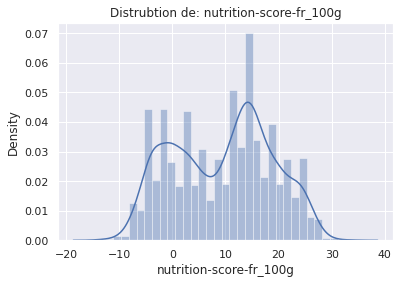

In [ ]:
for column in num_col: 
    plt.figure(figsize = (6,4))
    sns.distplot(df[column],axlabel=column)
    plt.title('Distrubtion de: {}'.format(column))
    plt.show()

In [ ]:
print(df.nutriscore_grade.value_counts())

d    2591
e    1606
a    1582
c    1503
b     795
Name: nutriscore_grade, dtype: int64


([<matplotlib.patches.Wedge at 0x7fe142c98c50>,
 [Text(0.5871101202142158, 0.9302159462952939, 'd'),
  Text(-0.9646208971303862, 0.5286837663664065, 'e'),
  Text(-0.8133335032387896, -0.7406001704761606, 'a'),
  Text(0.39547603705852163, -1.0264495623811658, 'c'),
  Text(1.047828524054828, -0.33474674632784857, 'b')],
 [Text(0.32024188375320856, 0.5073905161610693, '32.1%'),
  Text(-0.5261568529802106, 0.28837296347258534, '19.9%'),
  Text(-0.443636456312067, -0.40396372935063296, '19.6%'),
  Text(0.21571420203192088, -0.5598815794806359, '18.6%'),
  Text(0.5715428313026334, -0.18258913436064464, '9.8%')])

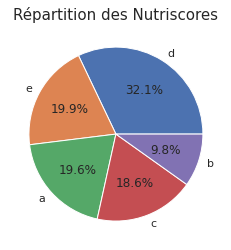

In [ ]:
 plt.title('Répartition des Nutriscores', size=15)
 plt.pie(df.nutriscore_grade.value_counts().values, 
        labels = df.nutriscore_grade.value_counts().index,
       autopct='%1.1f%%')

## 2. Analyse multivariée : 



**Partie 3 :Effectuer les tests statistiques appropriés pour vérifier la significativité des résultats.**

Calcul de coefficient linéaire (de Pearson )

In [ ]:
import scipy.stats as st
st.pearsonr(df["nutrition-score-fr_100g"],df["proteins_100g"])


(0.04126319378388897, 0.0002077370600870763)

**2.1 Matrice de corrélation (Diagonale)**
apres manipulation la de données

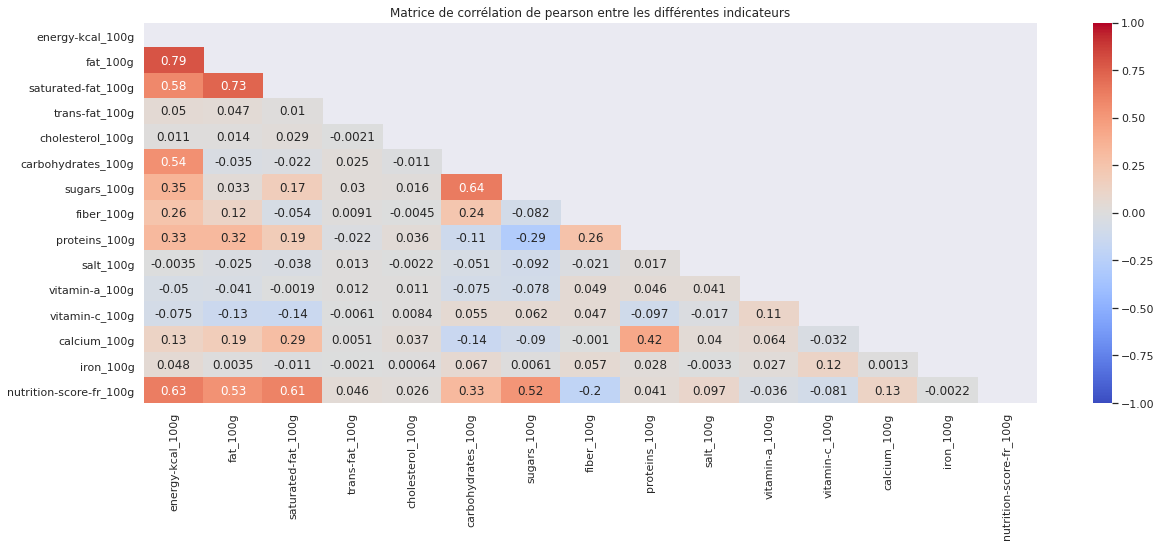

In [ ]:
plt.figure(figsize=(20,7))
sns.set(font_scale=1)
num_col= df.select_dtypes(include = ['float64']).columns
corr = df[num_col].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.title('Matrice de corrélation de pearson entre les différentes indicateurs')
sns.heatmap(corr,mask=mask,vmin=-1,vmax=1,cmap='coolwarm',center=0,annot=True)


Analyse du Matrice  : 

1. vitamin-a_100g, vitamin-c_100g,iron_100g,cholesterol_100g: pas de correlation remarquable
 
2. nutrition-score-fr_100g corréles avec : 
- energy-Kcal_100g
- fat_100g
-  saturated-fat_100g
- sugars_100g  

3. fat_100g et energy-Kcal_100g sont corréles

4.   sodium_100g et salt_100g sont corréles

5. sugars_100g  corréles avec :  
- carbohydrates_100g
- energy-Kcal_100g

6.   carbohydrates_100g et energy-kcal_100g sont corréles 


9.  saturated-fat_100g et fat sont corréles 


11.   calcium_100g et proteins_100g sont corréles






**2.2 Test du Chi 2** -  Test d'Indépendance pour 2 variables qualitatives :

- ce test s'applique à partir d'un tableau de contingence croise les deux variables qualitatives nominale 
- H0 : Les deux variables sont independants 
- H1 : les deux varibales sont liées 

In [ ]:
df_copy= df.copy()

In [ ]:
df_copy["fat_100g"]= pd.cut(df_copy["fat_100g"],3, labels=["low", "normal", "high"],include_lowest=True)
df_copy['fat_100g']= df_copy['fat_100g'].astype('object')
df_copy['fat_100g'].dtypes

dtype('O')

In [ ]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
x = df_copy['nutriscore_grade']
y= df_copy['fat_100g']
#tableau de contingence 
contingency_table = pd.crosstab(y,x)
print('Test d\'indépendance entre {} et {} '.format('nutriscore','fat'))
sp.stats.chi2_contingency(contingency_table)

Test d'indépendance entre nutriscore et fat 


(624.8535691477068,
 1.0593557375084489e-129,
 8,
 array([[  17.43196731,    8.76005943,   16.56147084,   28.55008048,
           17.69642194],
        [1350.29194008,  678.56010895, 1282.86269655, 2211.50848087,
         1370.77677355],
        [ 214.27609261,  107.67983162,  203.57583261,  350.94143865,
          217.52680451]]))

Variables non indépendantes (H0 rejetée) car p-value = 1.0593557375084489e-129 < alpha 

**2.3 Test anova** : entre variable qualitatives et quantitatives 
- pour appliquer l'analyse de variance ANOVA, les variables doivent avoir une distribution normale.
- Même si dans notre cas les données ne suivent pas une distribution normale, on va appliquer ce test juste pour l'apprentissage

Pour commencer on va étudier l'influence de la grade de nutriscore sur le fibre:

tout d'abord on peut visualiser l'influence de la grade en affichant les boîtes à moustaches :

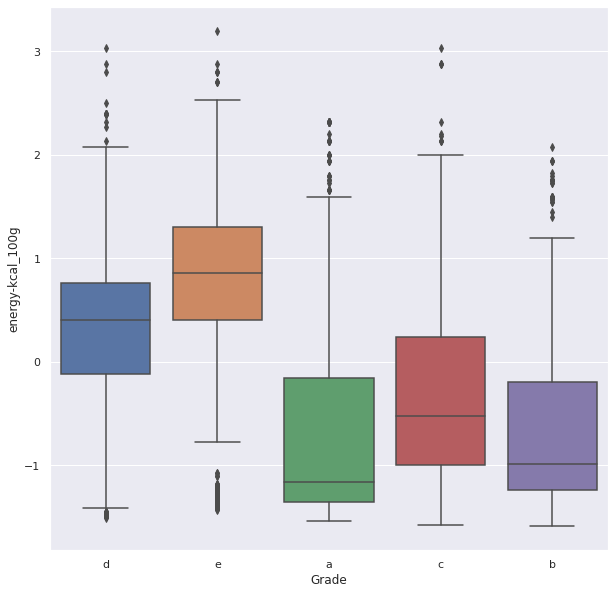

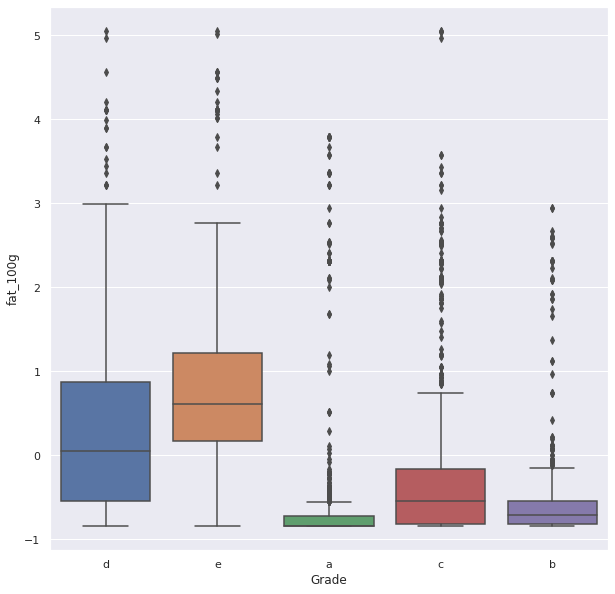

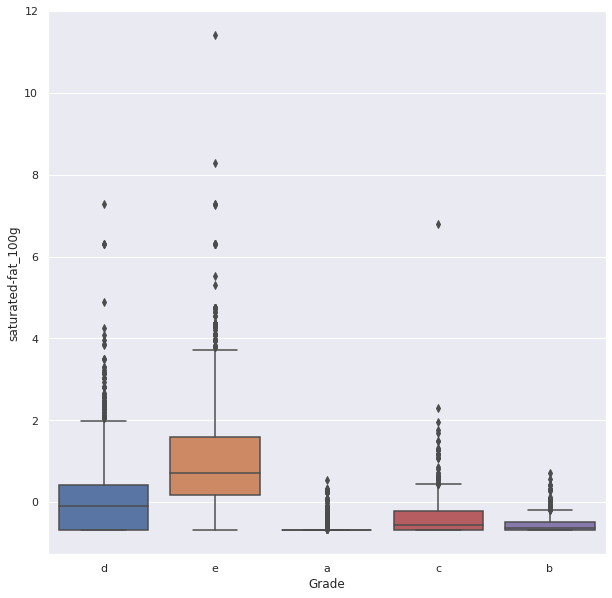

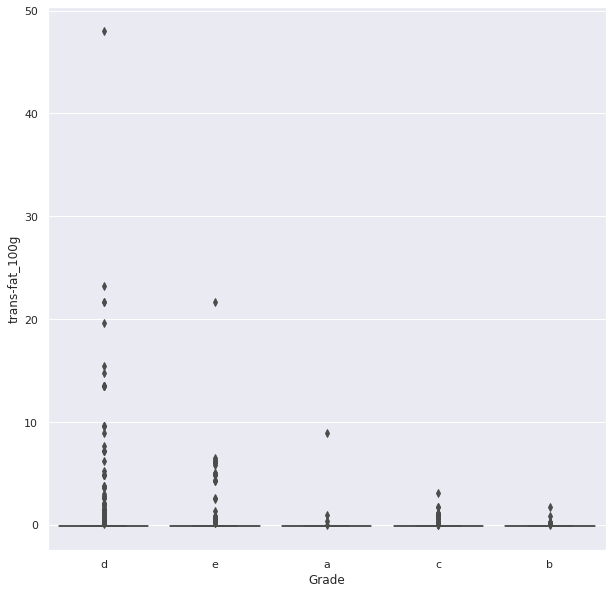

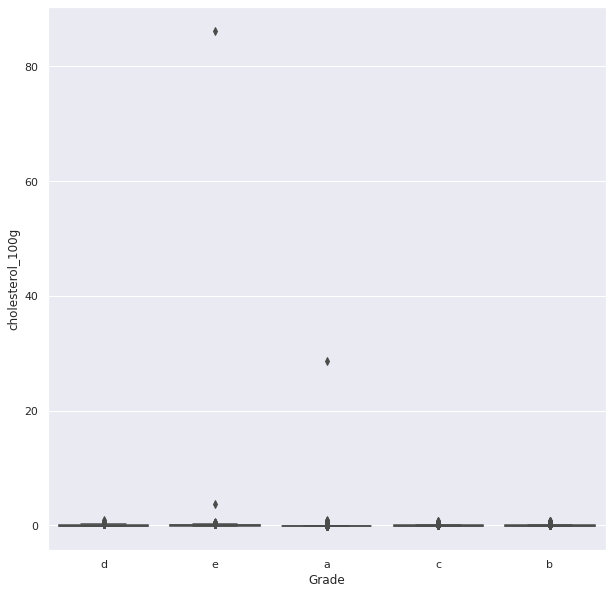

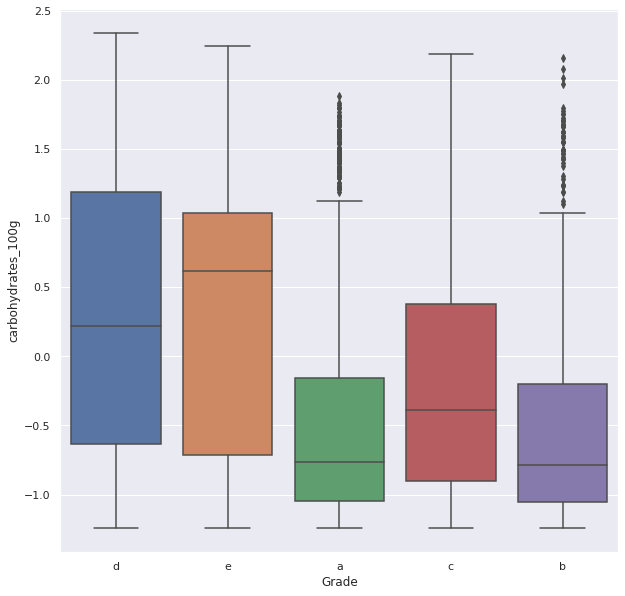

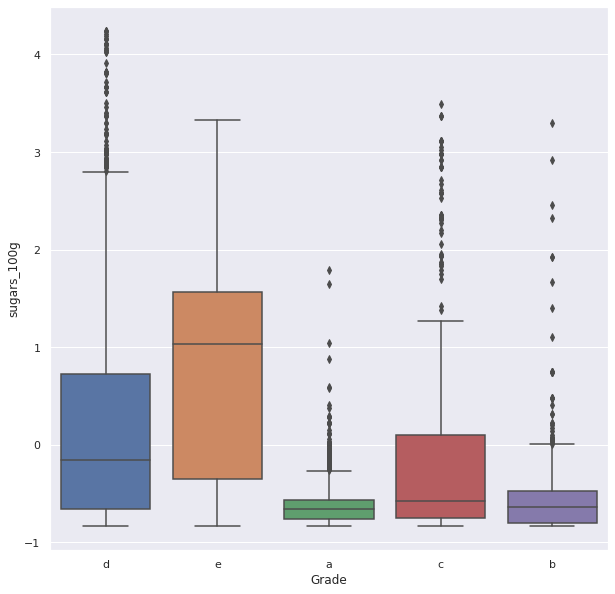

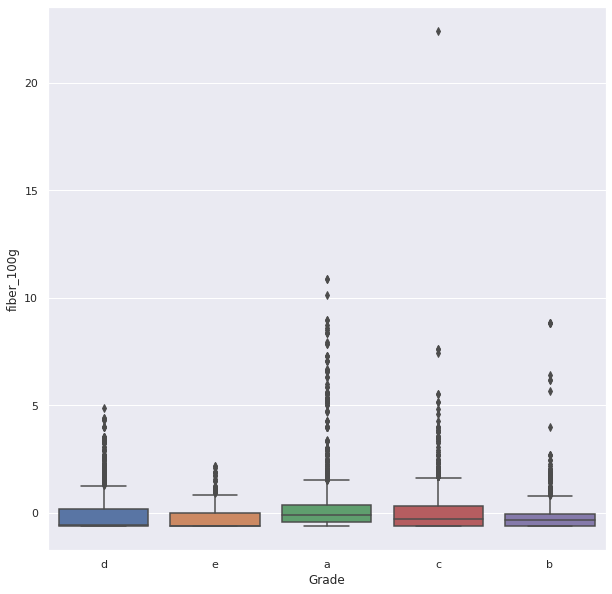

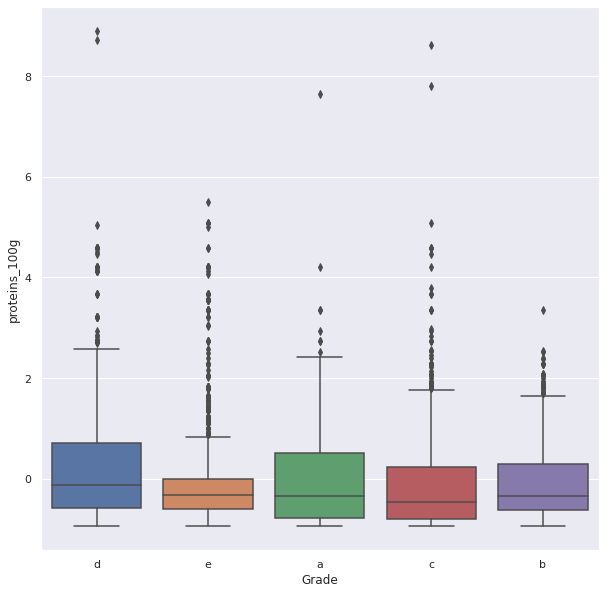

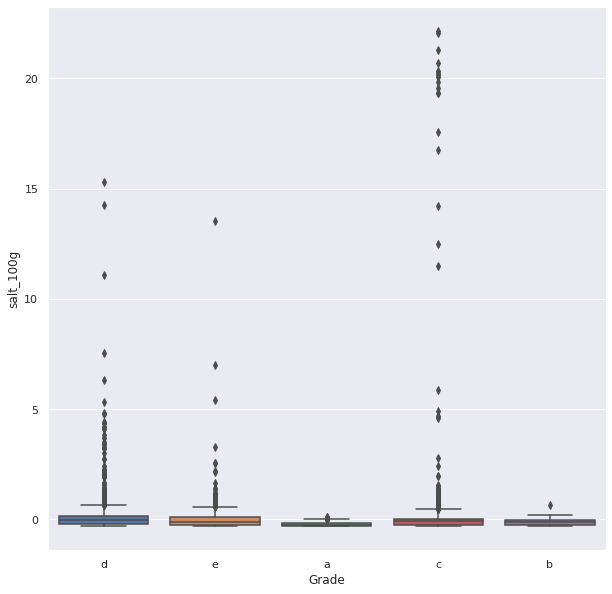

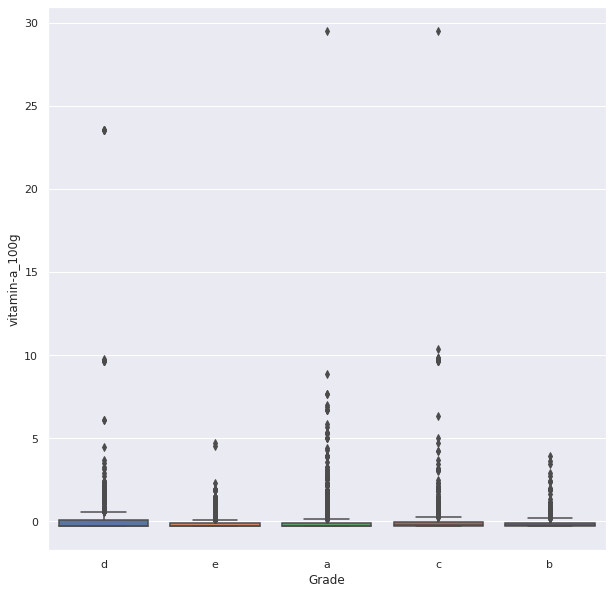

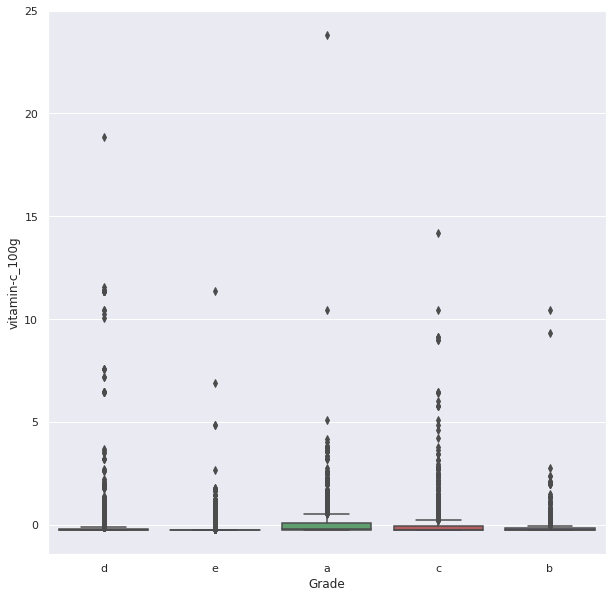

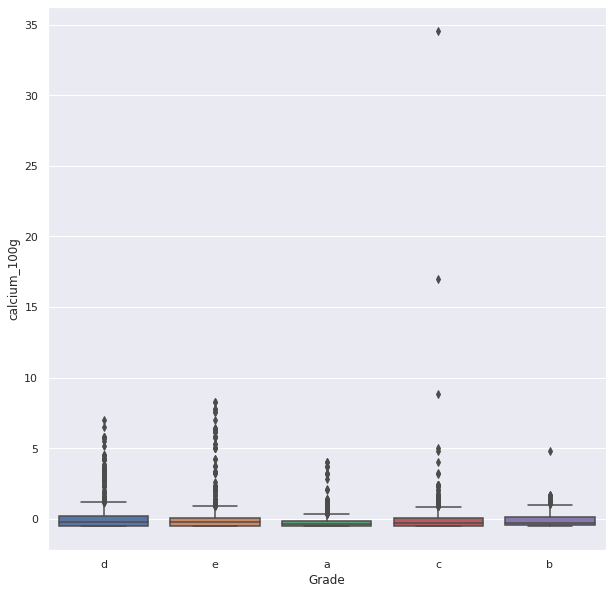

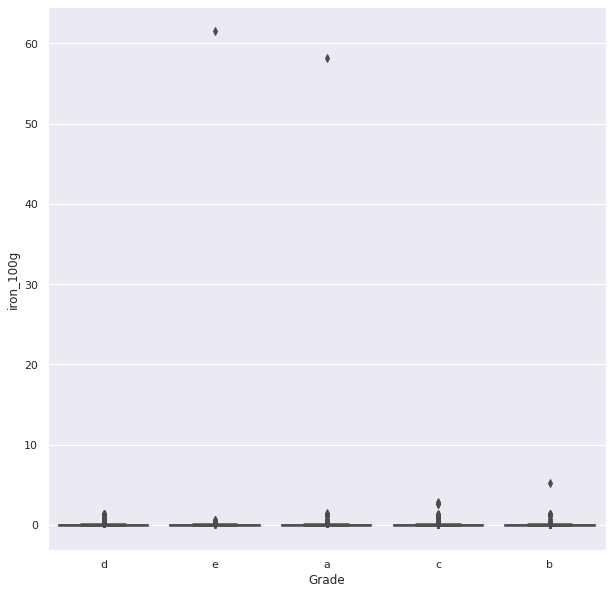

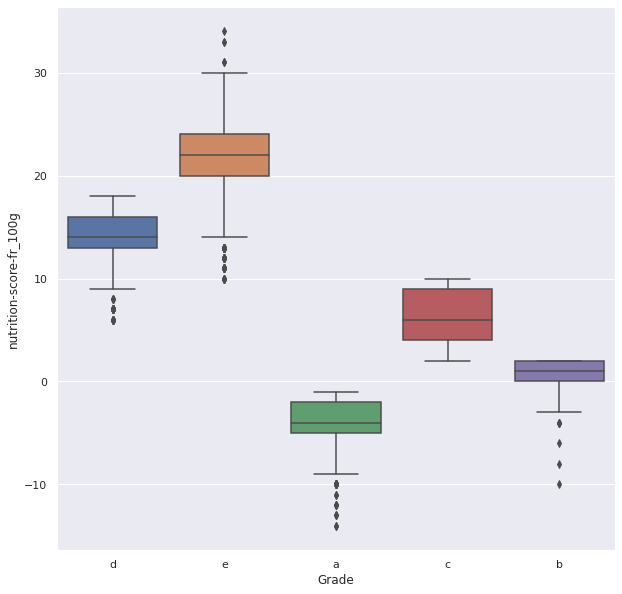

In [ ]:
for column in df.select_dtypes(['float64']).columns:
  sns.set()
  plt.figure(figsize=(10,10))
  ax = sns.boxplot(x="nutriscore_grade", y=column, data=df)
  plt.xlabel('Grade')
  plt.ylabel(column)
  plt.show()


In [ ]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
anova_variete = smf.ols('fiber_100g~nutriscore_grade', data=df).fit()
print(anova_variete.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:             fiber_100g   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     95.76
Date:                Wed, 11 Nov 2020   Prob (F-statistic):           9.95e-80
Time:                        11:24:02   Log-Likelihood:                -11361.
No. Observations:                8077   AIC:                         2.273e+04
Df Residuals:                    8072   BIC:                         2.277e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.35

La p-valeur de ce test (9.95e-80) est très petite et largement inférieure à 5 %. On rejette donc l'hypothèse H0.

La variété de grade a donc bien un effet sur le fibre, comme nous en avions l'intuition en regardant les boîtes à moustaches.

Pour obtenir le tableau de l'analyse de la variance, on utilise la commande anova_lm :

In [ ]:
sm.stats.anova_lm(anova_variete, typ=2)

,sum_sq,df,F,PR(>F)
nutriscore_grade,373.984778,4.0,95.764727,9.946116e-80
Residual,7880.785636,8072.0,NaN,NaN


In [ ]:
df.nutriscore_grade.value_counts().index

Index(['d', 'e', 'a', 'c', 'b'], dtype='object')

In [ ]:
a = df[df['nutriscore_grade'] == 'a'].select_dtypes(['float64'])
b = df[df['nutriscore_grade'] == 'b'].select_dtypes(['float64'])
c= df[df['nutriscore_grade'] == 'c'].select_dtypes(['float64'])
d = df[df['nutriscore_grade'] == 'd'].select_dtypes(['float64'])
e = df[df['nutriscore_grade'] == 'e'].select_dtypes(['float64'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2055

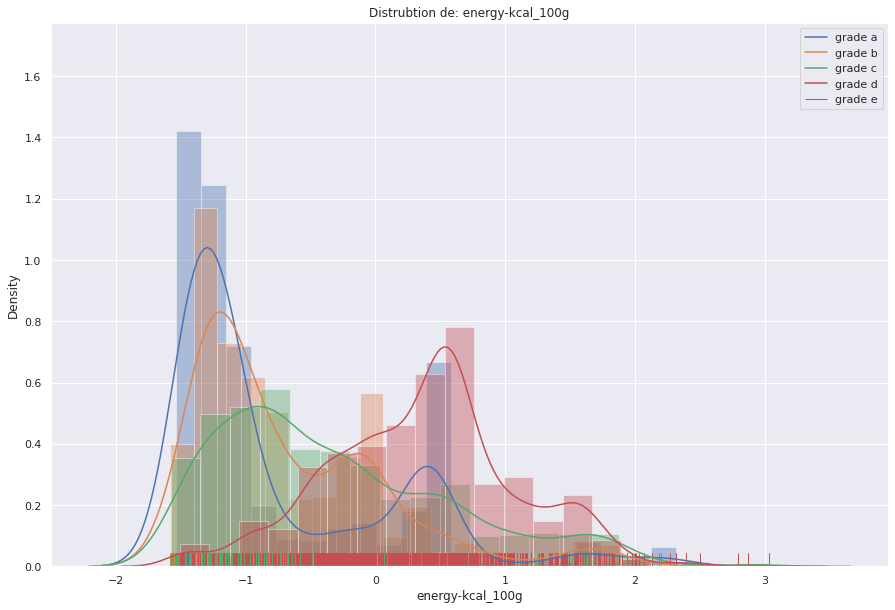

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2055

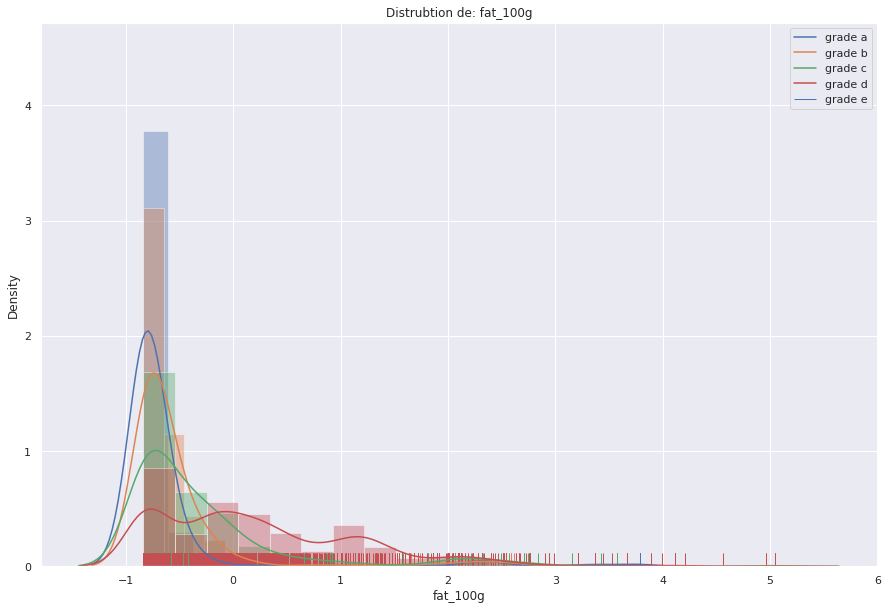

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2055

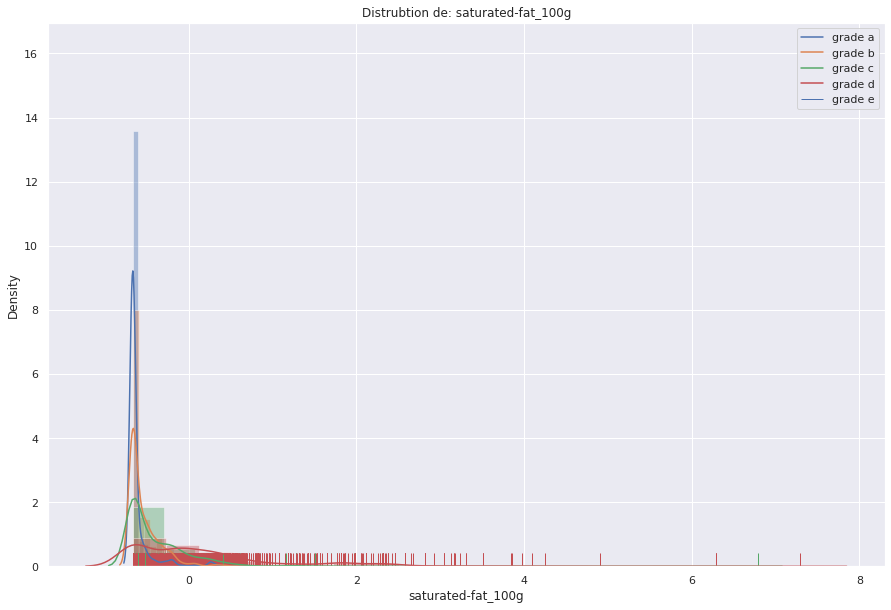

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2055

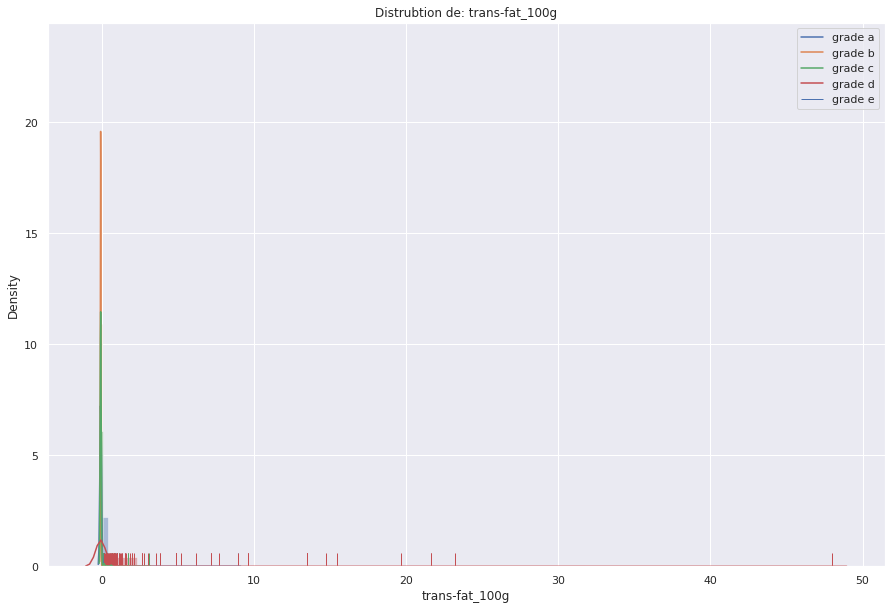

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2055

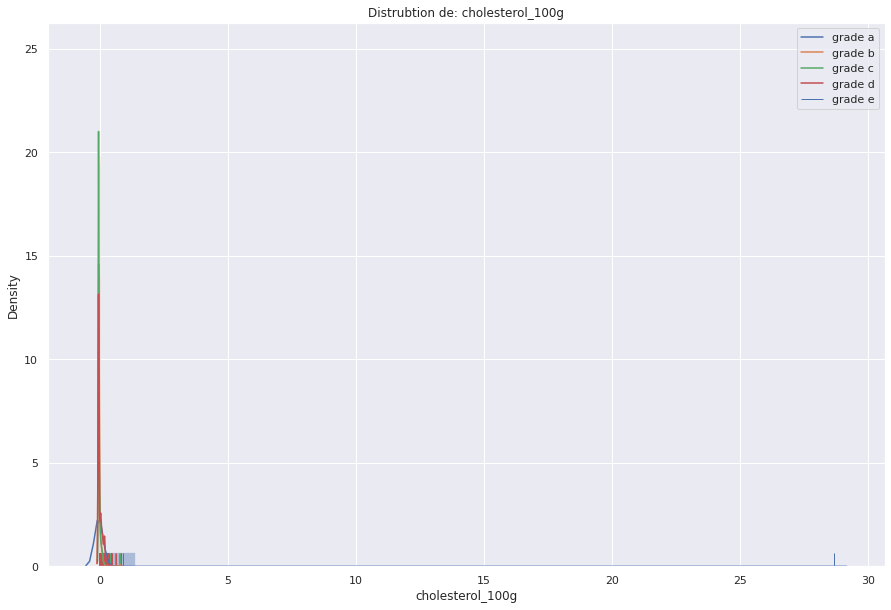

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2055

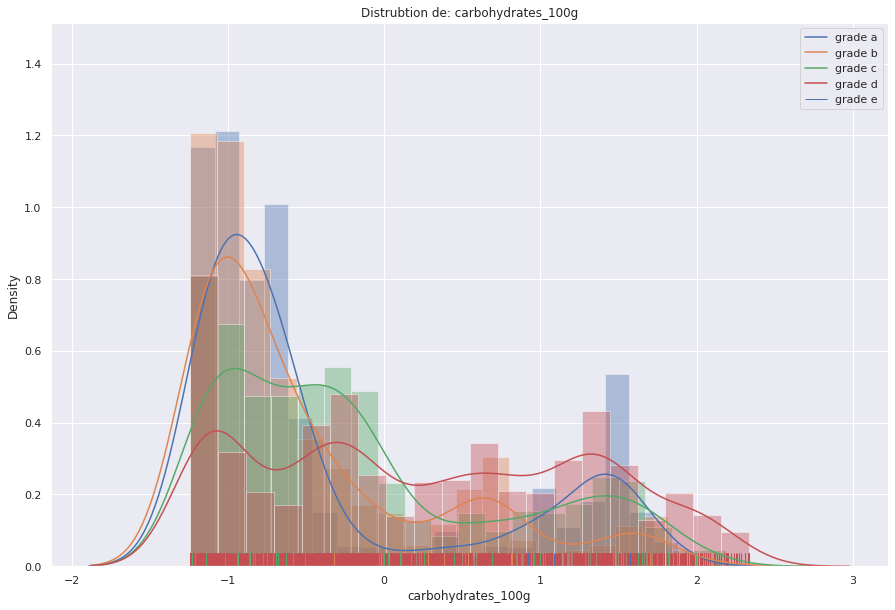

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2055

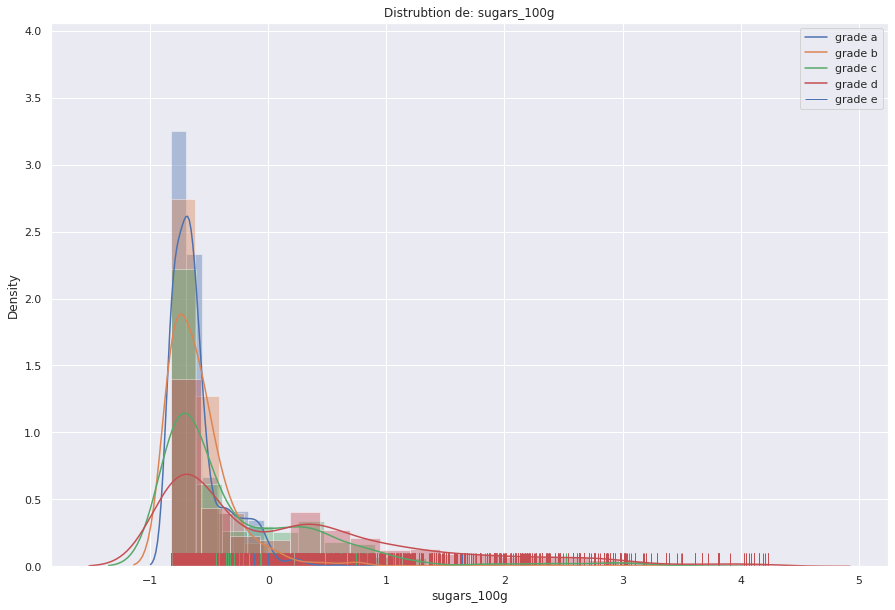

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2055

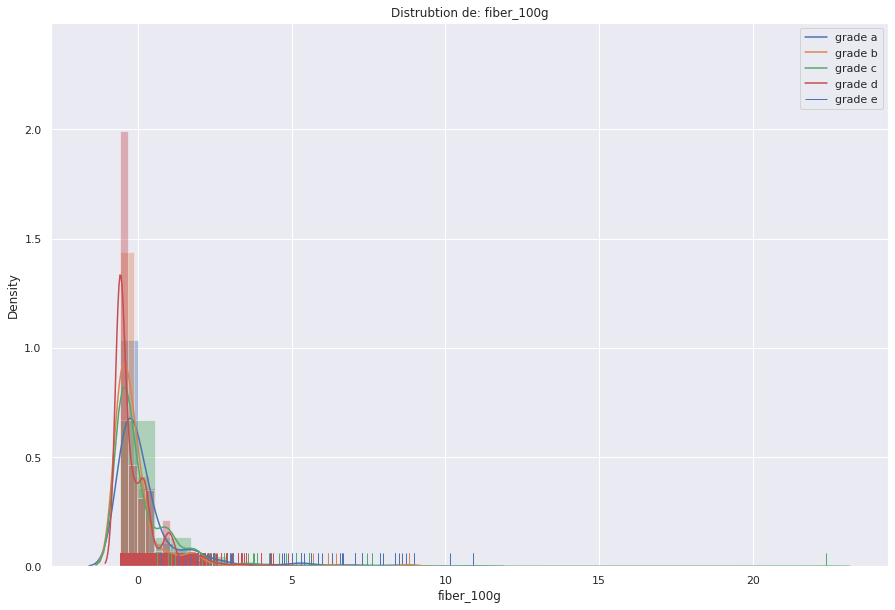

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2055

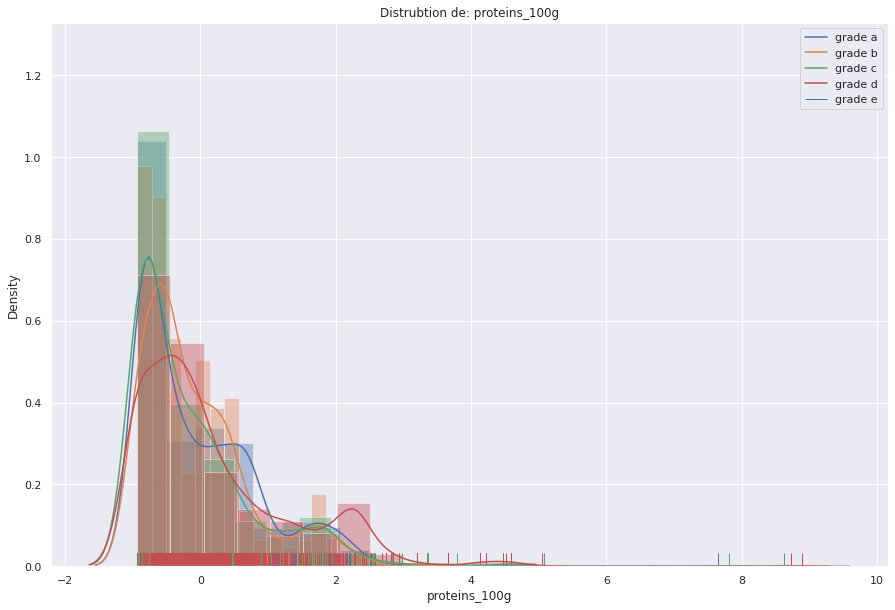

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2055

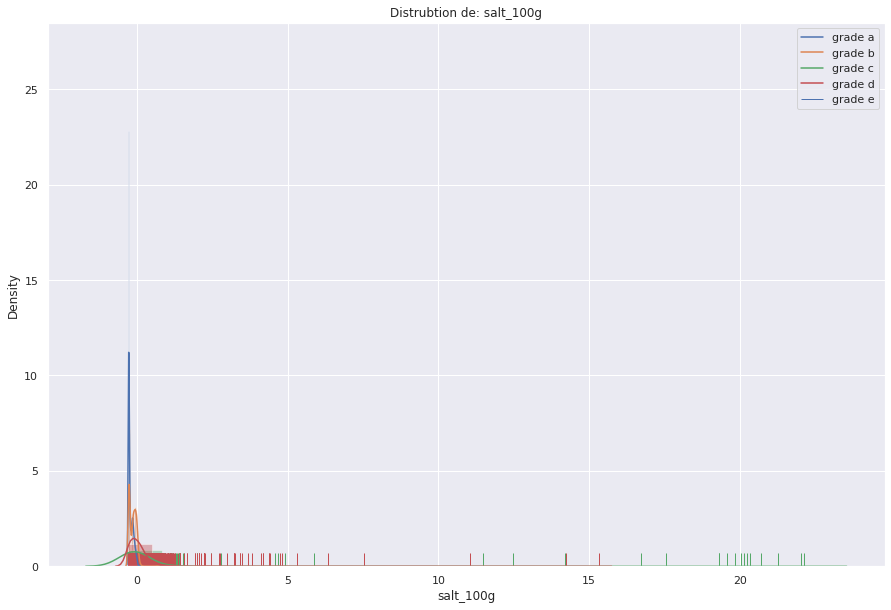

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2055

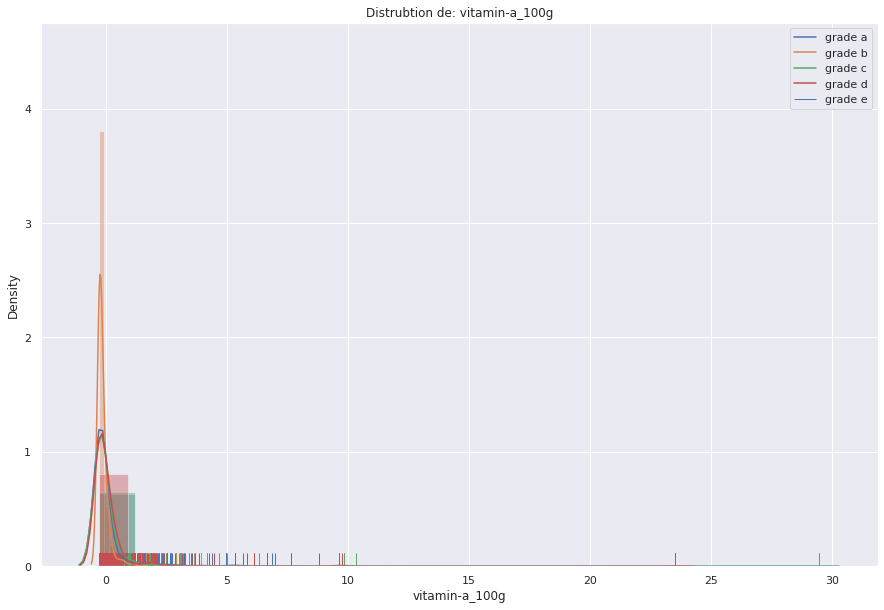

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2055

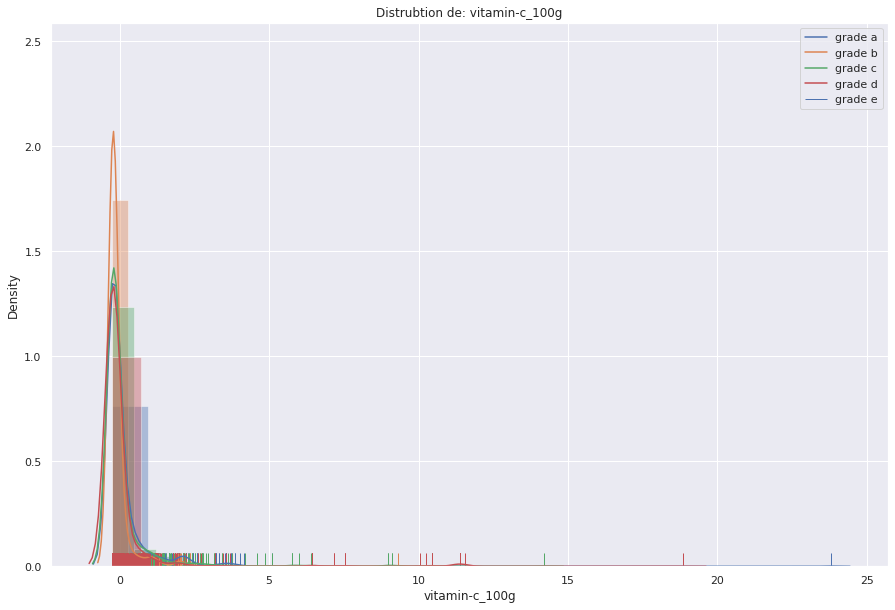

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2055

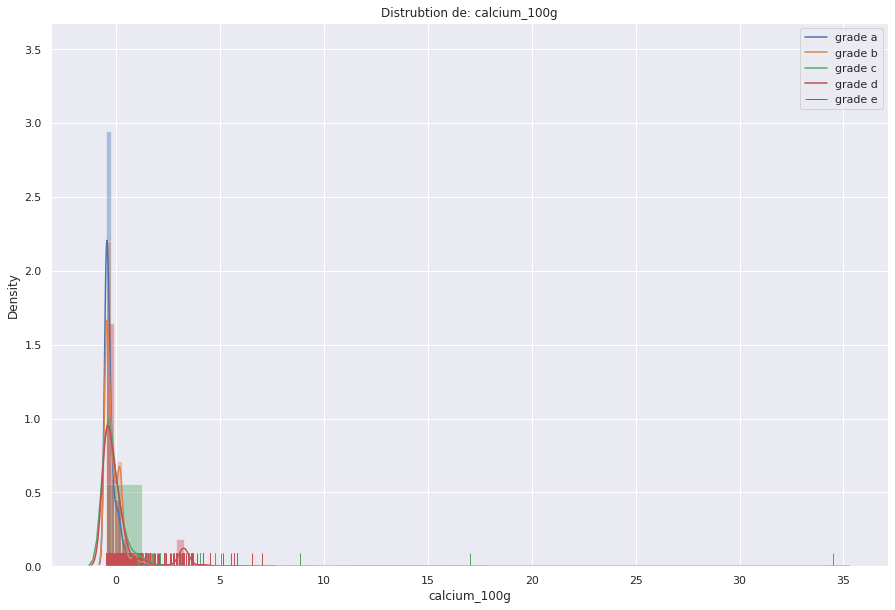

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2055

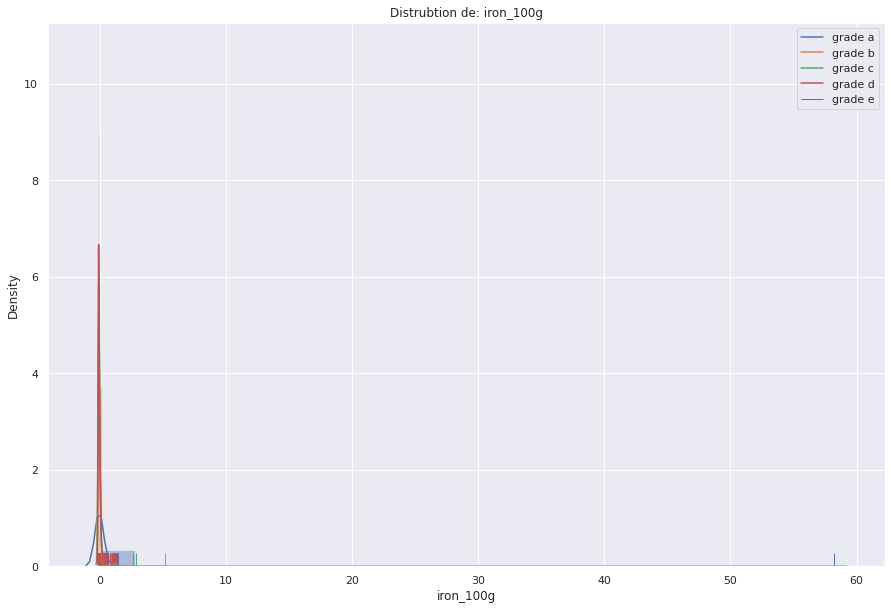

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2055

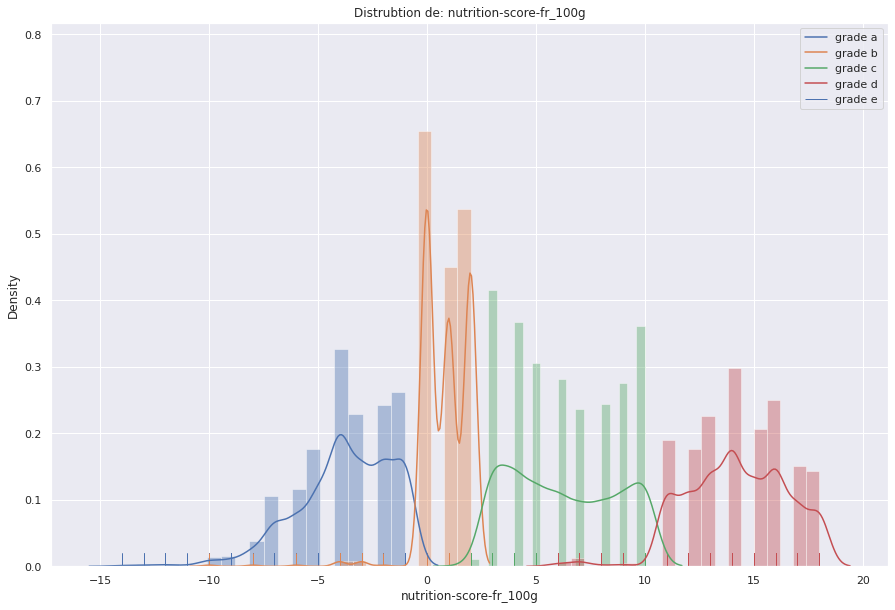

In [ ]:
for cols in df.select_dtypes(['float64']).columns:
  plt.figure(figsize=(15,10))
  plt.title('Distrubtion de: {}'.format(cols))
  sns.distplot(a[cols], bins=20, rug=True)
  sns.distplot(b[cols], bins=20, rug=True)
  sns.distplot(c[cols], bins = 20, rug=True)
  sns.distplot(d[cols], bins=20, rug=True)
  sns.displot(e[cols]),bins=20, rug = True)
  plt.legend(['grade a', 'grade b','grade c','grade d','grade e'])
  plt.show()

In [ ]:
 f_val, p_val = stats.f_oneway(a,b,c,d,e)
                                

In [ ]:
f_val

array([9.94407950e+02, 6.33147324e+02, 1.03774649e+03, 8.92819955e+00,
       1.92250193e+00, 2.20006821e+02, 6.53433410e+02, 9.57647266e+01,
       3.77261027e+01, 3.87551982e+01, 1.03876318e+01, 1.57981962e+01,
       4.81566932e+01, 3.85604243e-01, 2.62784178e+04])

In [ ]:
p_val

array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 3.43409596e-007,
       1.03728221e-001, 1.66262471e-179, 0.00000000e+000, 9.94611630e-080,
       2.56750298e-031, 3.49617541e-032, 2.16968365e-008, 6.93717177e-013,
       4.37473126e-040, 8.19094411e-001, 0.00000000e+000])

In [ ]:
df_anova= pd.DataFrame({'Indicateurs': a.columns.tolist(),'p-val' : p_val,'test' : p_val < alpha})

In [ ]:
df_anova

,Indicateurs,p-val,test
0,energy-kcal_100g,0.000000e+00,True
1,fat_100g,0.000000e+00,True
2,saturated-fat_100g,0.000000e+00,True
3,trans-fat_100g,3.434096e-07,True
4,cholesterol_100g,1.037282e-01,False
5,carbohydrates_100g,1.662625e-179,True
6,sugars_100g,0.000000e+00,True
7,fiber_100g,9.946116e-80,True
8,proteins_100g,2.567503e-31,True
9,salt_100g,3.496175e-32,True


on peut conclure que la plupart de variables etudies ont une distribution qui change en fonction des valeurs de nutriscore_grade sauf : iron_100g et cholesterol_100g.

## Analyse par composantes principales 

une analyse en composantes principales sur les seules variables quantitatives.
pour cela on doit centrer et réduire les variables pour réaliser une ACP normée , cela ce fait on utilisons la classe StandardScaler.

In [ ]:
#classe pour l'ACP
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
df_acp

,energy-kcal_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g
product_name,,,,,,,,,,,,,,
Vienna sausage made with chicken,-0.428838,0.214386,0.055746,-0.071943,0.134222,-1.163574,-0.826815,-0.589044,0.407898,0.274407,-0.260473,-0.243639,0.170460,-0.025897
"Kroger, american pasteurized process cheese singles",0.173765,0.656251,1.163203,-0.071943,0.125265,-1.047794,-0.550842,-0.589044,1.099263,0.345903,0.365559,-0.243639,2.275427,-0.091477
Creamy Peanut Butter,1.724911,2.511959,0.636639,-0.071943,-0.051647,-0.442683,-0.334681,0.835335,1.480350,0.002606,-0.260473,-0.243639,-0.160246,0.006894
Organic black bean dip,-1.249049,-0.836384,-0.670021,-0.071943,-0.051647,-0.577395,-0.667842,1.501576,-0.153433,0.114390,-0.080333,-0.243639,-0.165495,0.003833
Fettuccine,0.062172,-0.658629,-0.670021,-0.071943,0.033449,0.760623,-0.752837,0.054224,0.517332,-0.265223,-0.260473,-0.243639,-0.338722,0.019573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Fruit sauce,-1.154195,-0.836384,-0.670021,-0.071943,-0.051647,-0.551544,-0.069202,-0.336332,-0.933632,-0.281111,-0.260473,-0.185760,-0.485702,-0.073989
Salmon fillets,-0.456737,0.008266,-0.015298,-0.071943,0.107349,-1.224740,-0.821568,-0.589044,1.641282,-0.099533,-0.225397,-0.212474,-0.454206,-0.030560
Great Northern Beans,-0.038262,-0.748767,-0.670021,-0.071943,-0.051647,0.985628,-0.680959,5.154419,1.927098,-0.281111,-0.260473,-0.243639,-0.191742,0.127125


In [ ]:
# selection des colonnes à prendre en compte dans l'ACP
n_comp = 14
df_acp = df.drop(columns=['nutrition-score-fr_100g','nutriscore_grade'])
#convertir les données dans un array
X = df_acp.values
#sauvegarder le nom de lignes et colonnes 
names = df_acp.index
features = df_acp.columns
# réduire les données car les variables sont exprimées dans differentes unité. 
# centre les données car c'est obligatoire pour une ACP
# cela ce fait on mettont nos données à une moyenne nulle et une variance de 1
X_scaler = StandardScaler().fit_transform(X)
# Initialisation un objet de type PCA pour calcul les composantes principales
acp = PCA(n_components = n_comp)
# on donne les données a ce objet afin qu'il calcul les CP
acp.fit(X_scaler)
# ACP a été réalisé. Maintenant on peut interpréter graphiquement les résultats



PCA(copy=True, iterated_power='auto', n_components=14, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
#pour obtenir les variances (valeurs propres λk) associées aux axes factoriels:
#proportion associes aux axes : 
print('le pourcentage de variance expliquée par composante principale: {}'.format(acp.explained_variance_ratio_))

le pourcentage de variance expliquée par composante principale: [0.20139114 0.1439422  0.095958   0.07904138 0.07326621 0.07148358
 0.06988452 0.06797199 0.06322644 0.05824516 0.03639786 0.0219181
 0.01625984 0.00101357]


Les deux premières composantes principales représentent environ 33% de la variance des données


Text(0, 0.5, 'Variance cumulée')

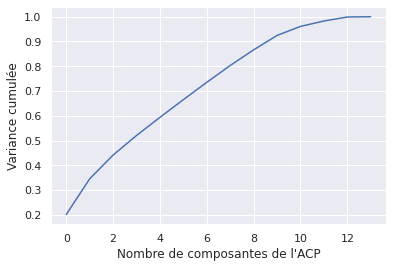

In [ ]:
plt.plot(np.cumsum(acp.explained_variance_ratio_))
plt.xlabel('Nombre de composantes de l\'ACP')
plt.ylabel('Variance cumulée')

on voit que à partir de  10 composante principale on atteind 95% de la variance de donnée, on peut donc reduire la dimension de notre jeu de données à 10 dans le but d'accélere l'apprentissage de la machine 

In [ ]:
from matplotlib.collections import LineCollection


def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(7,6))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)
        
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(7,6))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

def display_scree_plot(pca):
    scree = acp.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

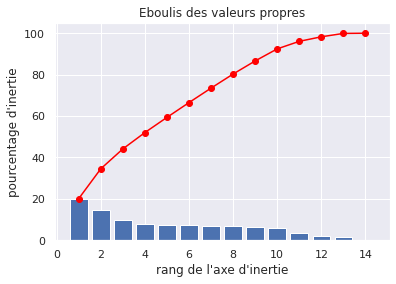

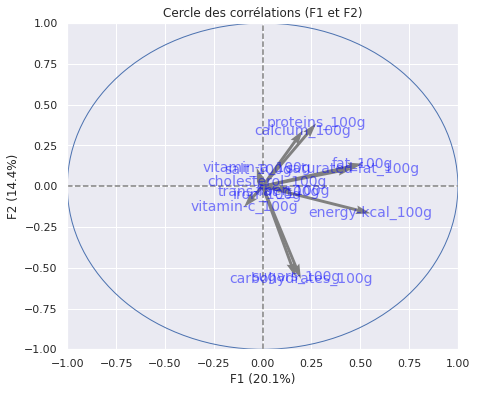

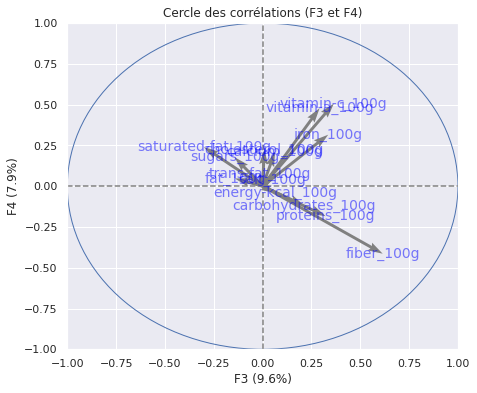

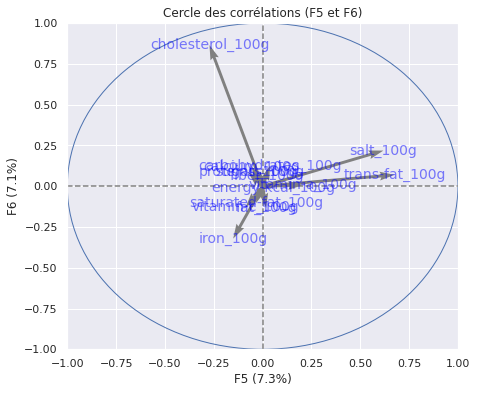

In [ ]:
# graphe d'Eboulis des valeurs propres, ce graphe affiche la variance expliquée par chaque composante principale de l'analyse.
display_scree_plot(acp)
#le contenu de chaque composantes 
pcs= acp.components_
# Cercle des corrélations
display_circles(pcs, n_comp, acp,[(0,1),(2,3),(4,5)],labels = np.array(features))
plt.show()

Dans cette partie on retient les 2 composantes les plus explicatives F1 et F2 :

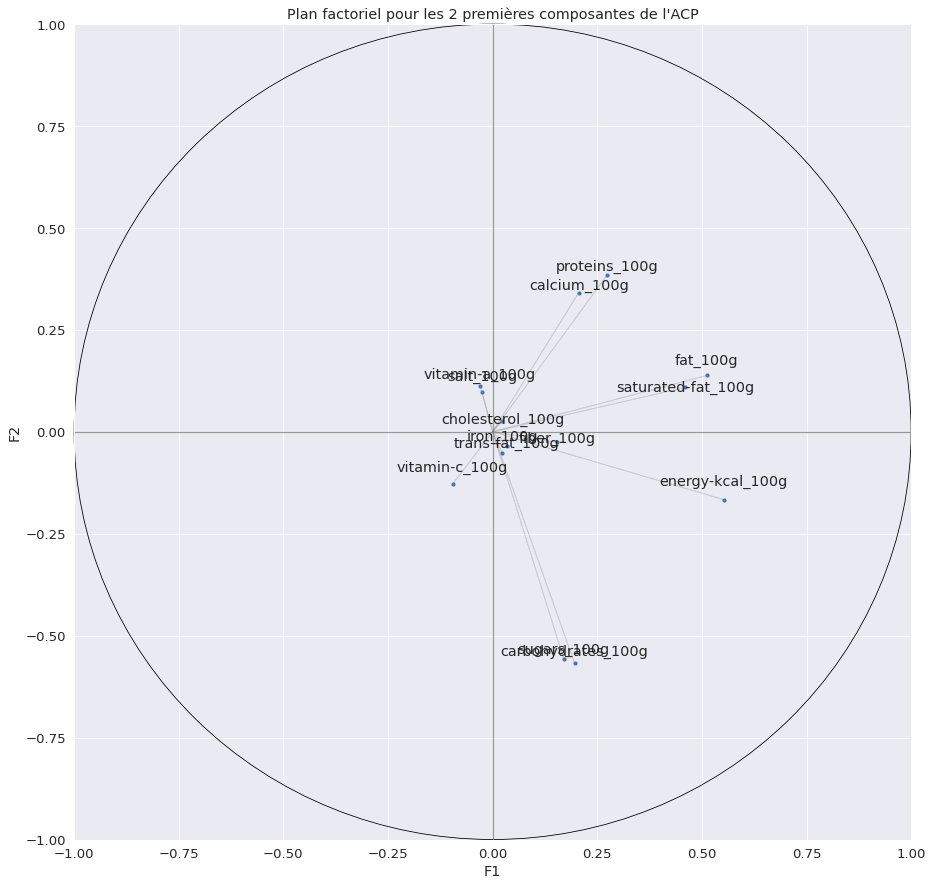

In [ ]:
from matplotlib.patches import Circle
sns.set_context("paper", font_scale=1.5) 
plt.figure(figsize=(15,15))
plt.title("Plan factoriel pour les 2 premières composantes de l'ACP")
plt.xlabel('F1')
plt.ylabel('F2')
ax = plt.gca()
ax.add_patch(Circle([0,0], radius=1, color='black', fill=False, linestyle='-', clip_on=False))
plt.xlim((-1,1))
plt.ylim((-1,1))
x_pca = acp.components_[0,:]
y_pca = acp.components_[1,:]
sns.scatterplot(x = x_pca,y = y_pca)
plt.plot([-1,1],[0,0], color='grey', alpha=0.8)
plt.plot([0,0],[-1,1], color='grey', alpha=0.8)

i = 0
for x,y,colonne in zip(x_pca,y_pca,features):

    plt.annotate(colonne,(x,y), textcoords="offset points", xytext=(0,5+np.random.randint(-10,10)),ha='center') 
    ax.arrow(0, 0, x, y, head_width=0, head_length=0, fc='grey', ec='grey',alpha=0.2)


sns.set_context("paper", font_scale=1)

Le graphe ci-dessus represente le plan factoriel pour F1 et F2. 
- Analyse de cercles de correlations:

- fat_100g et saturated-fat_100g sont tres proche et positivement corrélées 

*   fat_100g et saturated-fat_100g sont tres proche et positivement corrélées 
*   carbohydrates_100g et sugars_100g sont très proches et negativement corrélées 
*   calcium_100g et proteins_100g sont tres proches et positivement corrélées

- on voit que  ces résultats sont cohérents avec ce qui est observé dans l'analyse multivariée.



Calcul de nutri score par régression linéaire
- variable à prédire à partir des variables explicatives (caractéristiques nutritionnel)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import neighbors, metrics
from  sklearn.metrics  import confusion_matrix
from sklearn import model_selection

In [ ]:
df_reg = df.select_dtypes(['float64'])
X = df_reg.drop(['nutrition-score-fr_100g'],axis=1)
Y = df_reg['nutrition-score-fr_100g']

In [ ]:
df_reg = df.select_dtypes(['float64'])
X = df_reg.drop(['nutrition-score-fr_100g'],axis=1)
Y = df_reg['nutrition-score-fr_100g']
#scaler = StandardScaler()
#X = scaler.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=42)
#Entraînement du modèle
model_lr = LinearRegression().fit(X_train,Y_train)
#prediction
y_pred1 = model_lr.predict(X_test)
pd_resu1 = pd.DataFrame({'nutriscore' : Y_test, 'prediction_nutriscore' : y_pred1})

Évaluation du modèle de régression linéaire :  pour evaluer la performance de notre model, il fait mesurer les erreurs entre les valeurs prédites et vraies valeurs. Cela ce fait en utilisant deux métriques :
- L’erreur quadratique moyenne (l’erreur d’estimation) : MSE
- le coefficient de détermination (la qualité du modèle de régression) : R2

In [ ]:
RMSE = np.sqrt(metrics.mean_squared_error(Y_test,y_pred1))
R2 = model_lr.score(X_test,Y_test)
print('la performance d\'un model de regression:')
print('R² sur jeu de test', R2)
print('L’erreur quadratique moyenne RMSE',RMSE)

la performance d'un model de regression:
R² sur jeu de test 0.6644346828135018
L’erreur quadratique moyenne RMSE 5.375304595932824


In [ ]:
print('Poids de chaque variable dans la régression', model_lr.coef_)

Poids de chaque variable dans la régression [ 3.73588725  0.29620687  2.56384365  0.09746879  0.04779665 -0.27847879
  3.20202747 -2.17221956 -0.02347476  1.37770654  0.16543094 -0.15360197
  0.09723572 -0.02449255]


 ce graphe represente les valeurs de y en fonction des valeurs prédites avec le modèle de régresssion linéaire

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


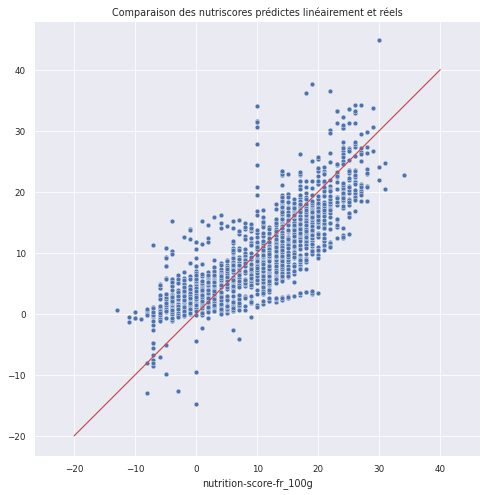

In [ ]:
plt.figure(figsize=(8,8))
plt.title('Comparaison des nutriscores prédictes linéairement et réels')
plt.axis('equal')
sns.scatterplot(Y_test, model_lr.predict(X_test))
sns.lineplot([-20,40],[-20,40], color='r')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2055

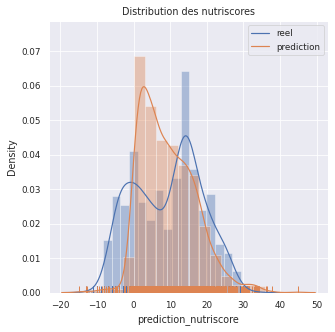

In [ ]:
plt.figure(figsize=(5,5))
plt.title('Distribution des nutriscores')
sns.distplot(pd_resu1['nutriscore'], bins=20, rug=True)
sns.distplot(pd_resu1['prediction_nutriscore'], bins = 20, rug=True)
plt.legend(['reel', 'prediction'])

 on developpe un model de  knn regressor pour la prédiction du nutrition score

In [ ]:
#GridSearchCV : permet de trouver le model avec les meilleurs parametres en comparant les differents performances de chaque combinaisons de train set et val set grace à la technique de cross validation 
from sklearn.model_selection import GridSearchCV

In [ ]:
df_reg = df.select_dtypes(['float64'])
X1 = df_reg.drop(['nutrition-score-fr_100g'],axis=1)
Y1 = df_reg['nutrition-score-fr_100g']
#X1 = scaler.fit_transform(X1)
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(X1,Y1, train_size=0.8)

In [ ]:
#les differentes valeurs des hyperparamètres à tester : valeur de K 
paramT = {'n_neighbors':[2,3,4,5,10,15]}
#scoring = la metrique utilise pour evaluer notre modele 
#cv = nombre de decoupe du train set (definir le strategie de decoupage qui nous intéresse)
clf1 = GridSearchCV(neighbors.KNeighborsRegressor(),paramT,cv=5,scoring='r2')
# Optimiser ce classifieur sur le jeu d'entraînement
clf1.fit(xtrain1,ytrain1)
# Afficher le hyperparamètre optimaux 
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(clf1.best_params_)
score='accuracy'
# Afficher les performances correspondantes
print("Résultats de la validation croisée :")
for mean, std, params in zip(
        clf1.cv_results_['mean_test_score'], # score moyen
        clf1.cv_results_['std_test_score'],  # écart-type du score
        clf1.cv_results_['params']           # valeur de l'hyperparamètre
    ):

    print("{} = {:.3f} (+/-{:.03f}) for {}".format(score,mean,std*2,params))

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'n_neighbors': 4}
Résultats de la validation croisée :
accuracy = 0.906 (+/-0.017) for {'n_neighbors': 2}
accuracy = 0.908 (+/-0.017) for {'n_neighbors': 3}
accuracy = 0.909 (+/-0.016) for {'n_neighbors': 4}
accuracy = 0.906 (+/-0.014) for {'n_neighbors': 5}
accuracy = 0.896 (+/-0.013) for {'n_neighbors': 10}
accuracy = 0.885 (+/-0.013) for {'n_neighbors': 15}


In [ ]:
y_pred11 = clf1.predict(xtest1)

In [ ]:
pd_resu33 = pd.DataFrame({'nutriscore' : ytest1, 'prediction_nutriscore' : y_pred11})

In [ ]:
pd_resu33

,nutriscore,prediction_nutriscore
product_name,,
"Frosted sugar cookies, frosted sugar",19.0,19.50
"Stuffing mix, turkey",12.0,11.75
"Sharon's, sorbet, mixed berry",4.0,5.25
"Beech's fine chocolates, luxury brazils nuts, dark chocolate",25.0,25.00
Lemonade,17.0,13.50
...,...,...
Almonds,14.0,10.25
Taco traditional sauce,9.0,8.00
Cheese Twists,21.0,15.25


In [ ]:
print(clf1.score(xtest1,ytest1))

0.9124346776892062


In [ ]:
print(np.sqrt(metrics.mean_squared_error(ytest1,y_pred11)))

2.7658255821707374


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


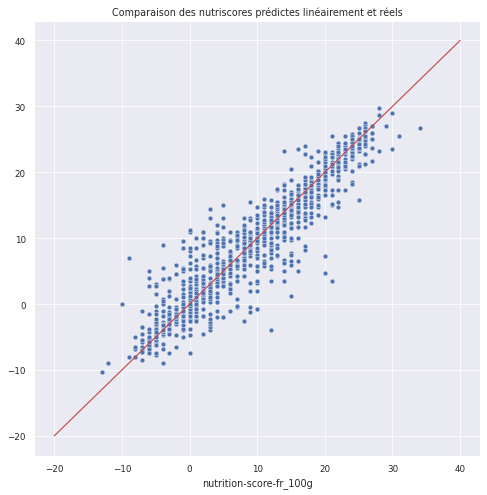

In [ ]:
plt.figure(figsize=(8,8))
plt.title('Comparaison des nutriscores prédictes linéairement et réels')
sns.scatterplot(ytest1, clf1.predict(xtest1))
sns.lineplot([-20,40],[-20,40], color='r')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2055

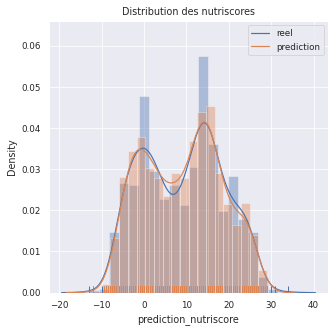

In [ ]:
plt.figure(figsize=(5,5))
plt.title('Distribution des nutriscores')
sns.distplot(pd_resu3['nutriscore'], bins=20, rug=True)
sns.distplot(pd_resu3['prediction_nutriscore'], bins = 20, rug=True)
plt.legend(['reel', 'prediction'])

on developpe un model de classification pour determine le grade

In [ ]:
from sklearn import neighbors
data =df.drop(['nutriscore_grade','nutrition-score-fr_100g'],axis=1)
target = df['nutriscore_grade']
xTrain, xTest, yTrain, yTest = train_test_split(data, target, train_size=0.8)

Notre but dans cette partie est de selectionner la valeur K

on modifie le nombre de voisins pour trouver la meilleur performance sur notre data set 

In [ ]:
#les differentes valeurs des hyperparamètres à tester : valeur de K 
param = {'n_neighbors':[2,3,4,5,10,15]}
# Créer un classifieur kNN avec recherche d'hyperparamètre par validation croisée
#scoring = la metrique utilise pour evaluer notre modele 
#cv = nombre de decoupe du train set (definir le strategie de decoupage qui nous intéresse)
clf = GridSearchCV(neighbors.KNeighborsClassifier(),param,cv=5,scoring='accuracy')
# Optimiser ce classifieur sur le jeu d'entraînement
clf.fit(xTrain, yTrain)
# Afficher le hyperparamètre optimaux 
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(clf.best_params_)
score='accuracy'
# Afficher les performances correspondantes
print("Résultats de la validation croisée :")
for mean, std, params in zip(
        clf.cv_results_['mean_test_score'], # score moyen
        clf.cv_results_['std_test_score'],  # écart-type du score
        clf.cv_results_['params']           # valeur de l'hyperparamètre
    ):

    print("{} = {:.3f} (+/-{:.03f}) for {}".format(score,mean,std*2,params))

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'n_neighbors': 3}
Résultats de la validation croisée :
accuracy = 0.793 (+/-0.024) for {'n_neighbors': 2}
accuracy = 0.802 (+/-0.031) for {'n_neighbors': 3}
accuracy = 0.797 (+/-0.029) for {'n_neighbors': 4}
accuracy = 0.795 (+/-0.027) for {'n_neighbors': 5}
accuracy = 0.777 (+/-0.034) for {'n_neighbors': 10}
accuracy = 0.765 (+/-0.024) for {'n_neighbors': 15}


Le modèle "optimal" obtenu est utilisé pour prédire l'échantillon test et estimer ainsi, une erreur de prévision.

In [ ]:
y_pred2 = clf.predict(xTest)
print((metrics.accuracy_score(yTest, y_pred2)))


0.8205445544554455


- on obtient une precision de 82%, ca veut dire que 82% du temps notre model effectue une bonne prediction.
- le model qu'on entraine n'est pas un model parfait, car il me manque de valeur dans le data set , de plus on a deja filtre notre data set alors le model qu'on a ne reflte pas totalement la realite.

In [ ]:
cm =metrics.confusion_matrix(yTest,y_pred2)
print(cm)

[[313  23   5   2   2]
 [ 38  86  22   7   0]
 [ 21  24 184  36   7]
 [  5   8  36 466  19]
 [  1   0   3  31 277]]


taux d'erreur d'apprentissage

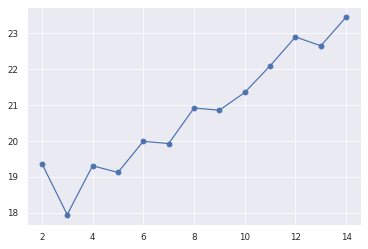

In [ ]:
errors = []
for k in range(2,15):
    knn = neighbors.KNeighborsClassifier(k)
    errors.append(100*(1 - knn.fit(xTrain, yTrain).score(xTest, yTest)))
plt.plot(range(2,15), errors, 'o-')
plt.show()

le meilleur modèle est le knn

**Partie 4 :Élaborer** **une idée d’application qui :**


-  Identifier le nutriscore du nouveau produit renseigne à l'aide de notre model 





enregistrer les modèles pour tester le modèle sur de nouvelles données

In [ ]:
import pickle
with open('sc.pkl', 'wb') as handle:
    pickle.dump(sc, handle)
with open('impute.pkl', 'wb') as handle:
    pickle.dump(model_impute, handle)
with open('predection.pkl', 'wb') as handle:
    pickle.dump(clf1, handle)
    #pickle.dump(model1, handle)

In [ ]:
def prediction (energy,fat,saturatedfat,transfat,cholesterol,carbohydrates,sugars,fiber,proteins,salt,vitamina,vitaminc,calcium,iron):
 X_product = pd.DataFrame({'energy-kcal_100g':energy ,'fat_100g':fat,'saturated-fat_100g':saturatedfat ,'trans-fat_100g':transfat ,'cholesterol_100g':cholesterol,'carbohydrates_100g': carbohydrates,'sugars_100g':sugars,'fiber_100g':fiber,'proteins_100g': proteins,'salt_100g':salt,'vitamin-a_100g':vitamina,'vitamin-c_100g':vitaminc ,'calcium_100g':calcium,'iron_100g':iron},index=[0])
 for colus in df.columns.tolist()[0:14]:
  for val in df[colus]:
    if val < 0.0:
      df[colus].replace(val,np.nan,inplace=True)

 for colus in df.columns.tolist()[0:14]:
  for val in df[colus]:
    if val > 100.0:
      df[colus].replace(val,np.nan,inplace=True)

 for val in df['energy-kcal_100g']:
    if val > 900.0 :
      df['energy-kcal_100g'].replace(val,np.nan,inplace=True)

 for val in df['energy-kcal_100g']:
    if val <= 0.0 :
      df['energy-kcal_100g'].replace(val,np.nan,inplace=True)    

 #X_product['indicateurs_n_joints'] = (X_product['proteins_100g']+X_product['fat_100g']+X_product['carbohydrates_100g'])
 #X_product = X_product.loc[X_product['indicateurs_n_joints']< 100.0]
#supprimer colonne 
 #X_product = X_product.drop(columns="indicateurs_n_joints")
 with open('sc.pkl', 'rb') as handle:
    sc = pickle.load(handle)
 X_product= sc.transform(X_product)
 with open('impute.pkl', 'rb') as handle:
    impute = pickle.load(handle)
 X_product_imputed = impute.transform(X_product)
 X_product_df= pd.DataFrame(data=X_product_imputed,columns=['energy-kcal_100g','fat_100g','saturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g','carbohydrates_100g','sugars_100g','fiber_100g', 'proteins_100g','salt_100g', 'vitamin-a_100g', 'vitamin-c_100g','calcium_100g', 'iron_100g'])
 #X_product_df.set_index('product_name',inplace=True)
 with open('predection.pkl', 'rb') as handle:
    predection1 = pickle.load(handle)
 return predection1.predict(X_product_df) 



In [ ]:
def prediction1(energy, fat, saturatedfat, transfat, cholesterol, carbohydrates, sugars, fiber, proteins, salt,vitamina, vitaminc, calcium, iron):
 x_product1 = pd.DataFrame({'energy-kcal-100g':energy ,'fat-100g': fat,'saturated-fat_100g': saturatedfat, 'saturated-fat_100g':saturatedfat ,'trans-fat_100g':transfat ,'cholesterol_100g':cholesterol,'carbohydrates_100g': carbohydrates,'sugars_100g':sugars,'fiber_100g':fiber,'proteins_100g': proteins,'salt_100g':salt,'vitamin-a_100g':vitamina,'vitamin-c_100g':vitaminc ,'calcium_100g':calcium,'iron_100g':iron }, index=[0])
 with open('sc.pkl', 'rb') as handle:
    sc = pickle.load(handle)
 x_product1= sc.transform(x_product1)
 with open('impute.pkl', 'rb') as handle:
    impute = pickle.load(handle)
 x_product_imputed = impute.transform(x_product1)
 df_product_imputed=pd.DataFrame(data=x_product_imputed,columns=['energy-kcal_100g','fat_100g','saturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g','carbohydrates_100g','sugars_100g','fiber_100g', 'proteins_100g','salt_100g', 'vitamin-a_100g', 'vitamin-c_100g','calcium_100g', 'iron_100g'])

 with open('class.pkl', 'rb') as handle:
    model = pickle.load(handle)
 return model.predict(df_product_imputed)

In [ ]:
prediction(energy=408,fat=14.1,saturatedfat=6.9,transfat=np.nan,cholesterol=np.nan,carbohydrates=np.nan,                
sugars=24.9,fiber=6,proteins=np.nan,salt=0.44,vitamina=np.nan,vitaminc=np.nan,calcium=np.nan,iron= np.nan)

array([11.5])

In [ ]:
df_1= pd.DataFrame({'energy':3.345,'fat':0.603,'saturated-fat':2.553,'trans-fat': 0.094,'cholesterol':0.050,'carbohydrates': -0.036,'sugars':3.190,'fiber':-2.218,'proteins':0.044,'salt':1.296,'vitamin-a':0.255,'vitamin-c':-0.160,'calcium':0.084,'iron':-0.023},index=[0])

In [ ]:
df_1

,energy,fat,saturated-fat,trans-fat,cholesterol,carbohydrates,sugars,fiber,proteins,salt,vitamin-a,vitamin-c,calcium,iron
0,3.345,0.603,2.553,0.094,0.05,-0.036,3.19,-2.218,0.044,1.296,0.255,-0.16,0.084,-0.023
